<a href="https://colab.research.google.com/github/MarceloDL-A/google_colab_Shopee/blob/main/C%C3%B3pia_de_D%26N_Teste_de_Conhecimentos_em_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python-Based Data Knowledge Test

In this test, you will have the opportunity to demonstrate your data handling skills using the Python programming language.

The test will consist of 3 stages of knowledge assessment in the areas of:

- *** Data Engineering (ETL, Queries, Automated Ingestion and Extraction) ***
- *** Data Visualization and Data Analysis ***
- *** Machine Learning Model Training ***

The purpose is to assess your overall knowledge in these areas, so there's no issue if you're unable to complete some of the modules. The key is to focus on your strongest skills. However, remember that the more comprehensive the result of your case is, the better your final outcome will be.

Delivery time will be evaluated, as deadlines are one of the most important aspects. Therefore, know how to prioritize what should be delivered based on your skill set. Again, do not worry if you are unable to complete all activities.

You should download this notebook and then host it on Google Colab with your saved results displayed. The code will be re-executed to validate if the provided code generates the shown result.

# Dataset Info

To carry out the above stages, we will use the "2015 Flight Delays and Cancellations" dataset from Kaggle, which contains public flight data from the major American airlines.

To download the dataset, download these 3 files:
- [airlines.csv](https://drive.google.com/file/d/1RFGzwjNtvSQ1Isq1AJL60R0y7ll50okT/view)
- [airports.csv](https://drive.google.com/file/d/11NKHy78lyYl6az1MMXIPX2LPht9ITLxA/view)
- [flights.csv](https://drive.google.com/file/d/1-g2JCBREVYkpDVrkOd0wNCmDsSG-sqFR/view)

## About Dataset
### Context
The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled, and diverted flights is published in DOT's monthly Air Travel Consumer Report and in this dataset of 2015 flight delays and cancellations.

### Acknowledgements
The flight delay and cancellation data was collected and published by the DOT's Bureau of Transportation Statistics.

# 1. Data Engineering (ETL, Queries, Automated Ingestion and Extraction)

## Instructions for the ETL Task

1. Import the data from the 'airlines.csv', 'airports.csv', and 'flights.csv' files into the corresponding tables in the SQLite database.
2. Use SQL commands to transform and combine this data as needed.
3. Identify the top 5 airports with the highest number of delays. Consider departure delays ('DEPARTURE_DELAY').
4. Create a new table 'top_airports_delay' and insert the results of the previous query into this table.
5. Show the result of table in table or dataframe format.

In [6]:
import sqlite3
import pandas as pd
import missingno as mn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:


# Create a connection to the SQLite database (created in memory for this example)
conn = sqlite3.connect(':memory:')

# Create a cursor to execute SQL commands
cursor = conn.cursor()

# Create tables for each of the CSV files
# Table for airlines.csv
cursor.execute('''
    CREATE TABLE airlines (
        IATA_CODE TEXT PRIMARY KEY,
        AIRLINE TEXT
    );
''')

# Table for airports.csv
cursor.execute('''
    CREATE TABLE airports (
        IATA_CODE TEXT PRIMARY KEY,
        AIRPORT TEXT,
        CITY TEXT,
        STATE TEXT,
        COUNTRY TEXT,
        LATITUDE REAL,
        LONGITUDE REAL
    );
''')

# Table for flights.csv
cursor.execute('''
    CREATE TABLE flights (
        YEAR INTEGER,
        MONTH INTEGER,
        DAY INTEGER,
        DAY_OF_WEEK INTEGER,
        AIRLINE TEXT,
        FLIGHT_NUMBER INTEGER,
        TAIL_NUMBER TEXT,
        ORIGIN_AIRPORT TEXT,
        DESTINATION_AIRPORT TEXT,
        SCHEDULED_DEPARTURE INTEGER,
        DEPARTURE_TIME REAL,
        DEPARTURE_DELAY REAL,
        TAXI_OUT REAL,
        WHEELS_OFF REAL,
        SCHEDULED_TIME REAL,
        ELAPSED_TIME REAL,
        AIR_TIME REAL,
        DISTANCE INTEGER,
        WHEELS_ON REAL,
        TAXI_IN REAL,
        SCHEDULED_ARRIVAL INTEGER,
        ARRIVAL_TIME REAL,
        ARRIVAL_DELAY REAL,
        DIVERTED INTEGER,
        CANCELLED INTEGER,
        CANCELLATION_REASON TEXT,
        AIR_SYSTEM_DELAY REAL,
        SECURITY_DELAY REAL,
        AIRLINE_DELAY REAL,
        LATE_AIRCRAFT_DELAY REAL,
        WEATHER_DELAY REAL
    );
''')


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path_airlines = "/content/drive/MyDrive/Colab Notebooks/airlines.csv"
path_airports = "/content/drive/MyDrive/Colab Notebooks/airports.csv"
path_flights = "/content/drive/MyDrive/Colab Notebooks/flights.csv"

In [3]:
# !pip install missingno

In [7]:


# Carregando os dados
airlines_data = pd.read_csv(path_airlines, low_memory=False)
airports_data = pd.read_csv(path_airports,low_memory=False)
flights_data = pd.read_csv(path_flights, low_memory=False)

Missing values in Airlines Data:


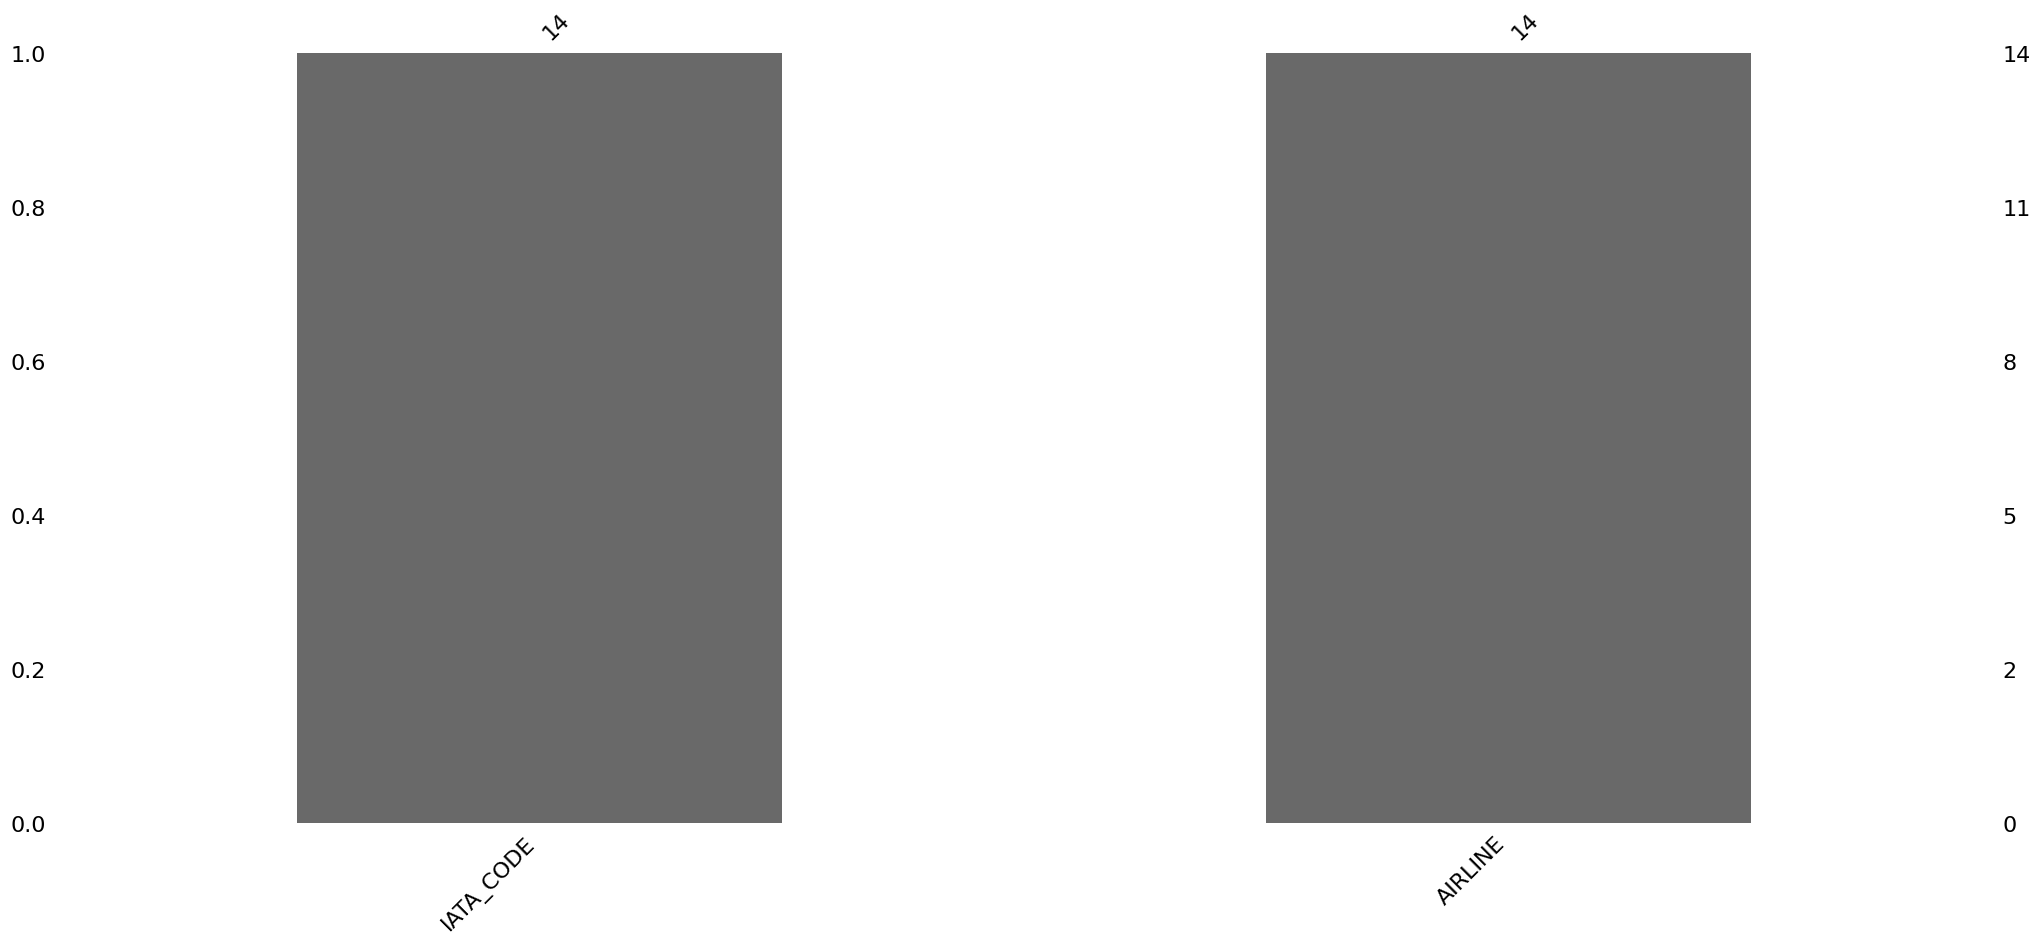

Missing values in Airports Data:


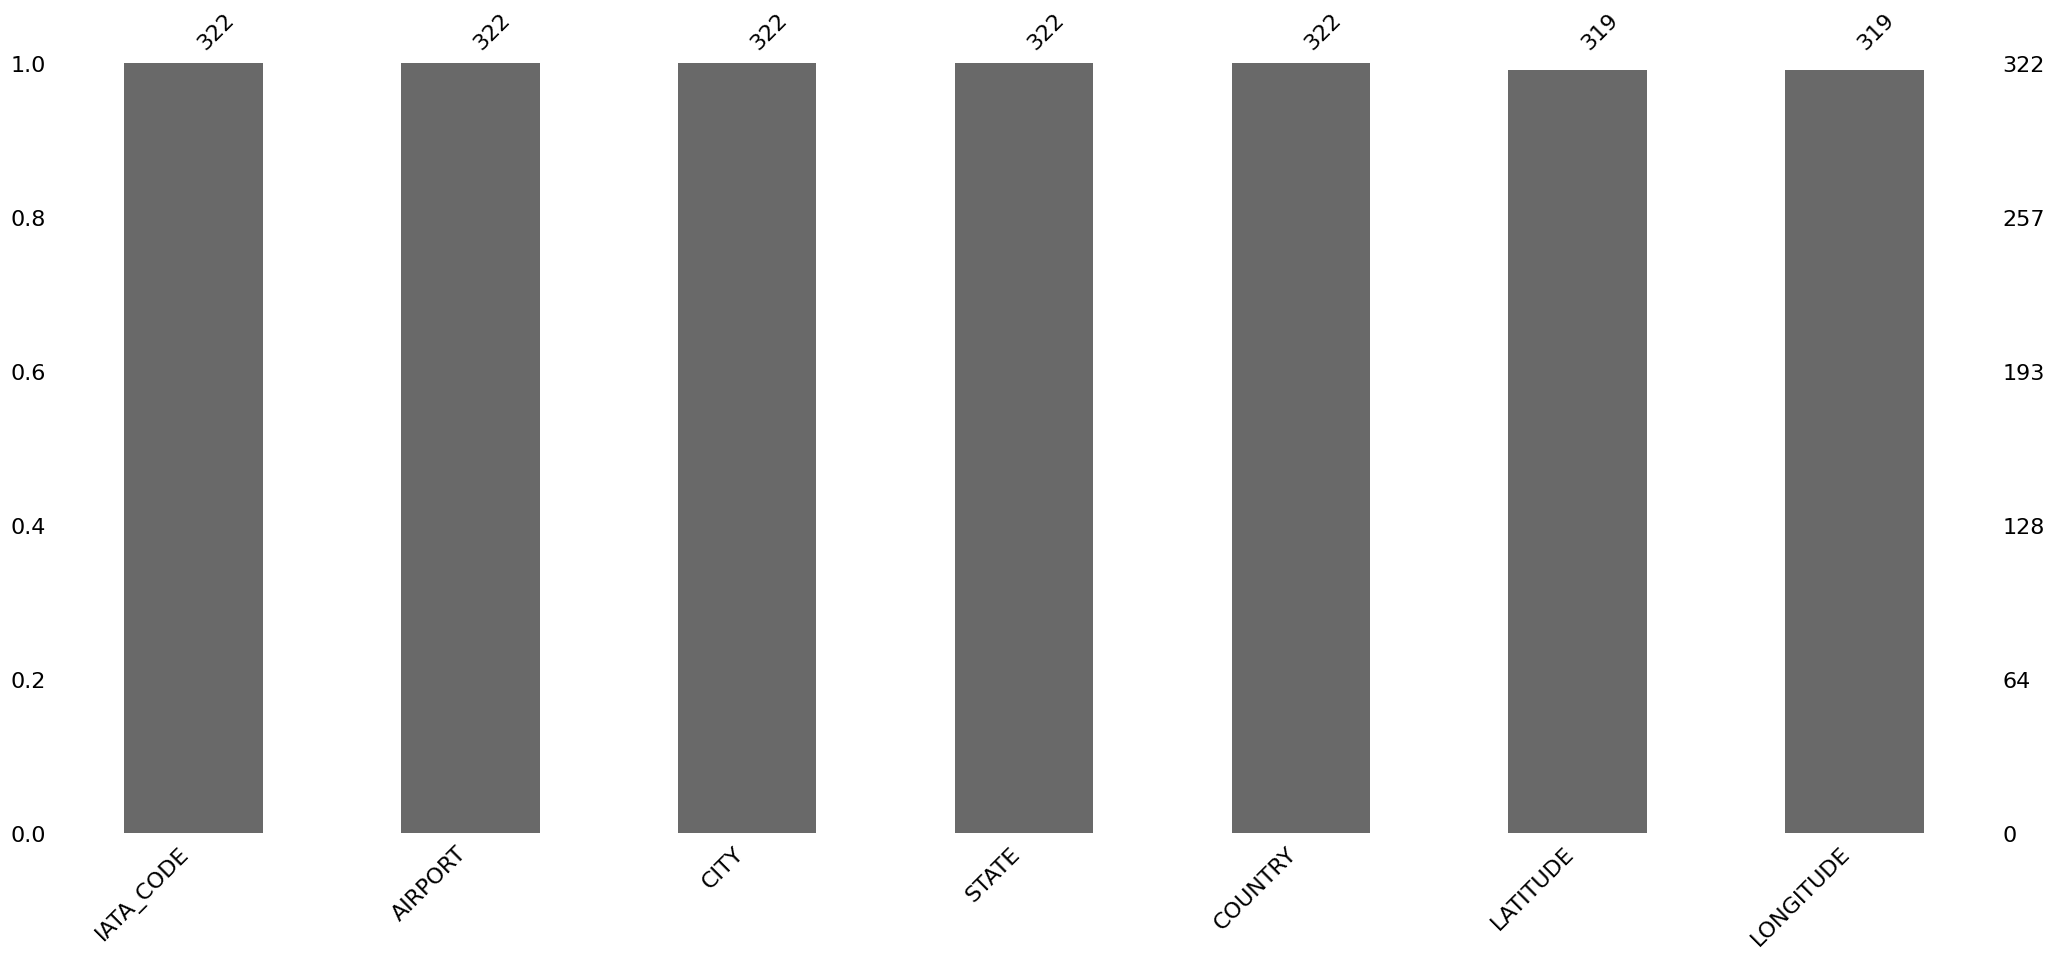

Missing values in Flights Data:


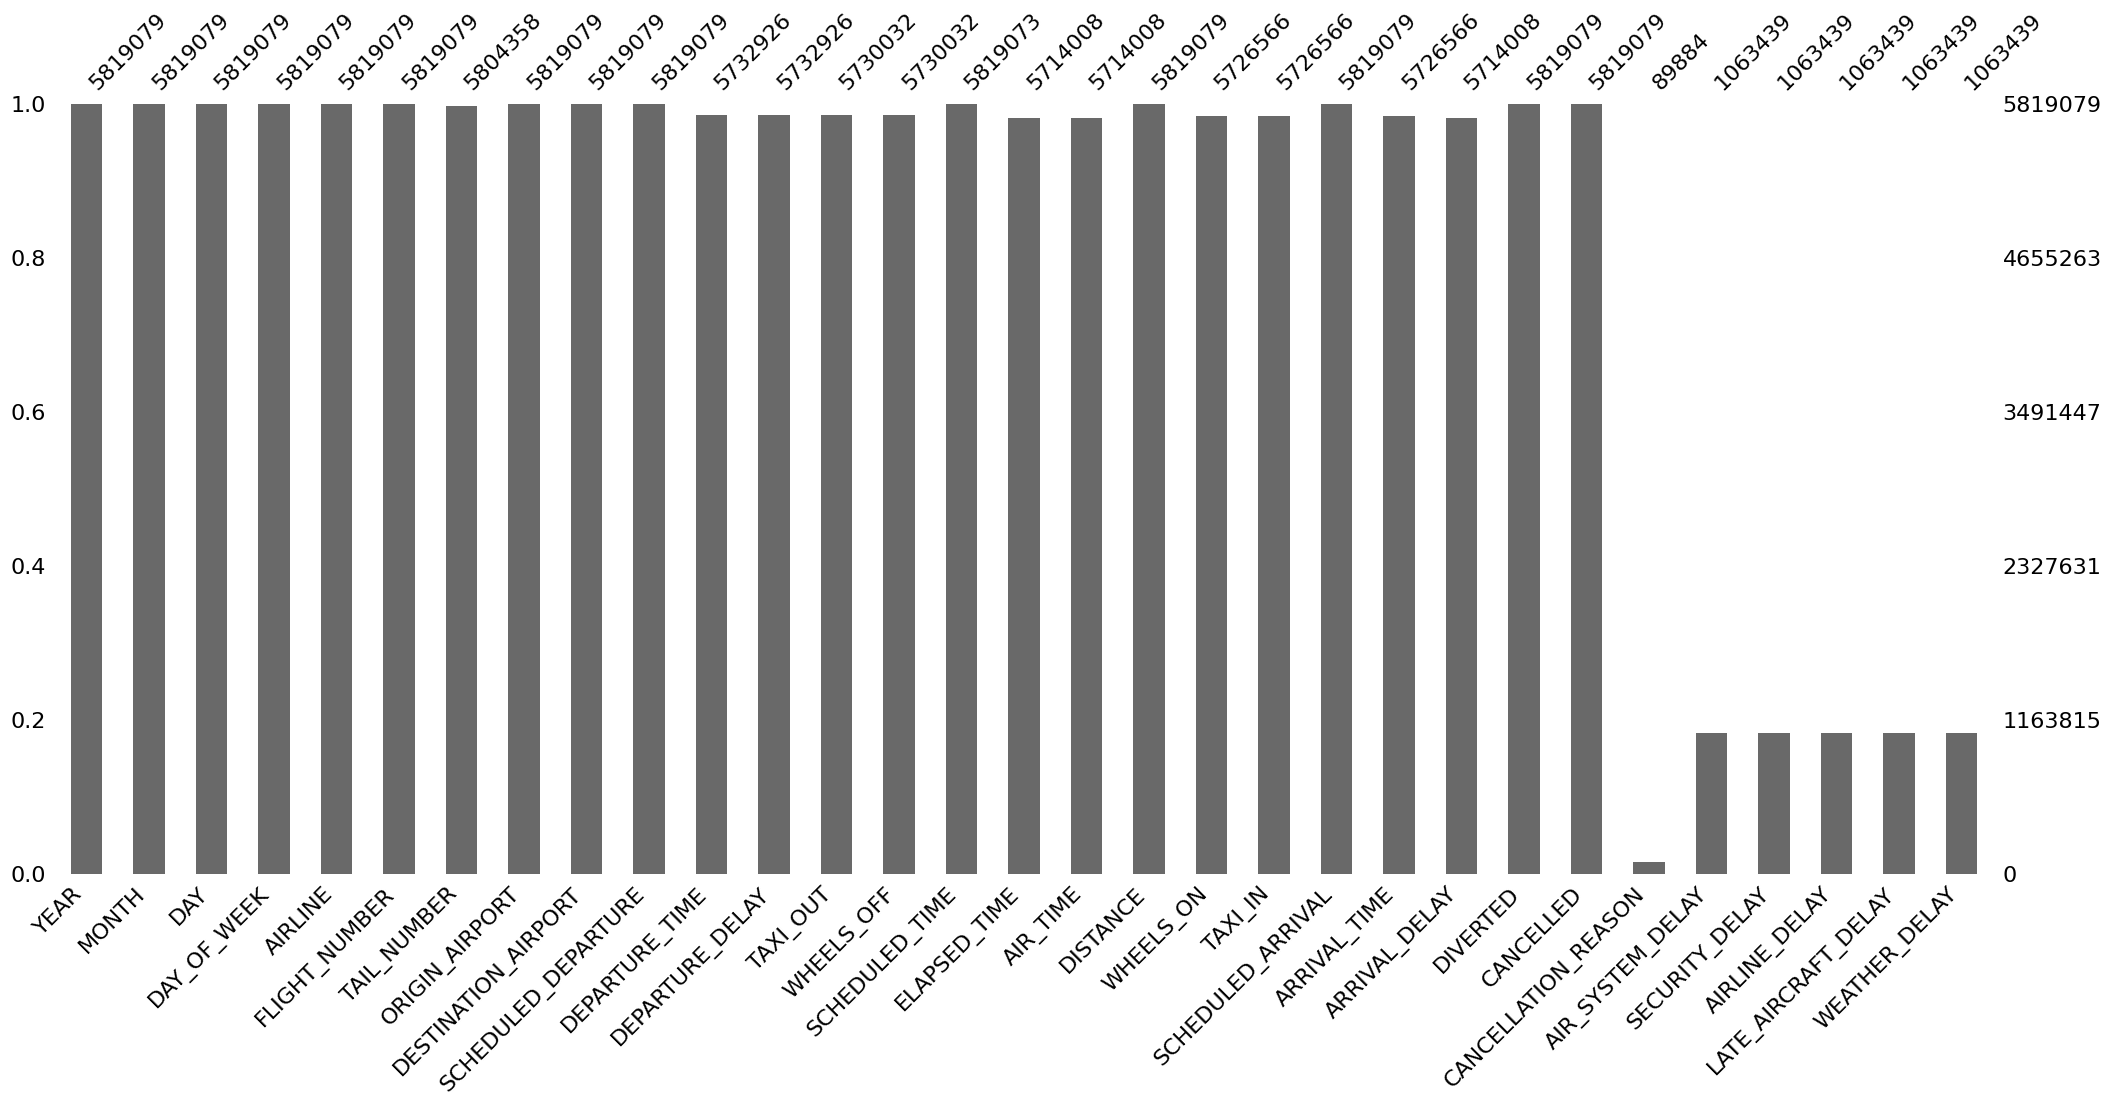

In [7]:

# Definindo nomes para os dataframes para uso no loop
airlines_data.name = 'Airlines Data'
airports_data.name = 'Airports Data'
flights_data.name = 'Flights Data'

# Lista de dataframes para iterar
dataframes = [airlines_data, airports_data, flights_data]

# Usando um loop para imprimir a quantidade de valores ausentes em cada dataframe
for df in dataframes:
    print(f"Missing values in {df.name}:")
    mn.bar(df)
    plt.show()  # Mostra o gráfico de barras para cada dataframe

In [24]:
# Usando um loop para imprimir a quantidade de valores ausentes em cada dataframe
for df in dataframes:
    print(f"\nMissing values in {df.name}:")
    print(df.isnull().sum())


Missing values in Airlines Data:
IATA_CODE    0
AIRLINE      0
dtype: int64

Missing values in Airports Data:
IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

Missing values in Flights Data:
YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                 

In [25]:
# Check infos

def explore_data(df, df_name):
    """
    Explora os dados de um DataFrame, exibindo informações básicas,
    estatísticas descritivas e dados sobre valores faltantes.
    """
    print(f"\nExplorando {df_name}:")
    print("\nPrimeiras linhas:")
    print(df.head())
    print("\nInformações do DataFrame:")
    print(df.info())
    print("\nEstatísticas para colunas numéricas:")
    print(df.describe())
    print("\nValores faltantes em cada coluna:")
    print(df.isnull().sum())

def check_info(airlines_data, airports_data, flights_data):
    # Dicionário de DataFrames
    dataframes = {
        'airlines': airlines_data,
        'airports': airports_data,
        'flights': flights_data
    }

    # Explora cada DataFrame
    for name, dataframe in dataframes.items():
        explore_data(dataframe, name)

# Suponha que airlines_data, airports_data, e flights_data já estão carregados como DataFrames
# Você precisaria ter estes DataFrames definidos anteriormente como resultado do seu código de carregamento

# Chama a função para verificar informações
check_info(airlines_data, airports_data, flights_data)



Explorando airlines:

Primeiras linhas:
  IATA_CODE                 AIRLINE
0        UA   United Air Lines Inc.
1        AA  American Airlines Inc.
2        US         US Airways Inc.
3        F9  Frontier Airlines Inc.
4        B6         JetBlue Airways

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 352.0+ bytes
None

Estatísticas para colunas numéricas:
       IATA_CODE                AIRLINE
count         14                     14
unique        14                     14
top           UA  United Air Lines Inc.
freq           1                      1

Valores faltantes em cada coluna:
IATA_CODE    0
AIRLINE      0
dtype: int64

Explorando airports:

Primeiras linhas:
  IATA_CODE                              AIRPORT   

In [26]:
# Create SQLite Database and Tables

# Create a connection to a new SQLite database in memory
conn = sqlite3.connect(':memory:')

# Create cursor to execute SQL commands
cursor = conn.cursor()

# Creating tables in the SQLite database
cursor.execute('''
CREATE TABLE airlines (
    IATA_CODE TEXT PRIMARY KEY,
    AIRLINE TEXT
);''')

cursor.execute('''
CREATE TABLE airports (
    IATA_CODE TEXT PRIMARY KEY,
    AIRPORT TEXT,
    CITY TEXT,
    STATE TEXT,
    COUNTRY TEXT,
    LATITUDE REAL,
    LONGITUDE REAL
);''')

cursor.execute('''
CREATE TABLE flights (
    YEAR INTEGER,
    MONTH INTEGER,
    DAY INTEGER,
    DAY_OF_WEEK INTEGER,
    AIRLINE TEXT,
    FLIGHT_NUMBER INTEGER,
    TAIL_NUMBER TEXT,
    ORIGIN_AIRPORT TEXT,
    DESTINATION_AIRPORT TEXT,
    SCHEDULED_DEPARTURE INTEGER,
    DEPARTURE_TIME REAL,
    DEPARTURE_DELAY REAL,
    TAXI_OUT REAL,
    WHEELS_OFF REAL,
    SCHEDULED_TIME REAL,
    ELAPSED_TIME REAL,
    AIR_TIME REAL,
    DISTANCE INTEGER,
    WHEELS_ON REAL,
    TAXI_IN REAL,
    SCHEDULED_ARRIVAL INTEGER,
    ARRIVAL_TIME REAL,
    ARRIVAL_DELAY REAL,
    DIVERTED INTEGER,
    CANCELLED INTEGER,
    CANCELLATION_REASON TEXT,
    AIR_SYSTEM_DELAY REAL,
    SECURITY_DELAY REAL,
    AIRLINE_DELAY REAL,
    LATE_AIRCRAFT_DELAY REAL,
    WEATHER_DELAY REAL
);''')



In [27]:
# Insert data from pandas DataFrame to SQLite database
airlines_data.to_sql('airlines', conn, if_exists='append', index=False)
airports_data.to_sql('airports', conn, if_exists='append', index=False)
flights_data.to_sql('flights', conn, if_exists='append', index=False)


5819079

In [28]:
# Perform Queries
# SQL query to find the top 5 airports with the highest number of delays
query = '''
SELECT ORIGIN_AIRPORT, COUNT(*) AS TOTAL_DELAYS
FROM flights
WHERE DEPARTURE_DELAY > 0
GROUP BY ORIGIN_AIRPORT
ORDER BY TOTAL_DELAYS DESC
LIMIT 5;
'''

top_airports = pd.read_sql_query(query, conn)
top_airports


,ORIGIN_AIRPORT,TOTAL_DELAYS
0,ATL,129846
1,ORD,121706
2,DFW,96475
3,DEN,89290
4,LAX,81954


# 2. Data Visualization and Data Analysis

## Instructions for the Data Visualization Module
### Distribution of Delays by Airline:
- Create a chart showing the distribution of delays (both positive and negative) for each airline.
- The chart should allow for easy comparison between the companies.

### Relationship Between Flight Distance and Delays:
- Create a scatter plot that relates flight distance to departure delay.
- Identify any visible trends or patterns.

### Delays by Airline:
- Visualize how delays vary throughout the day.
- Consider showing the average delays by hour of departure.

### Map of Delays by Airport:
- Create a map visualization showing the location of airports with the quantity or percentage of delays.
- This may involve integrating geographical data of airports with flight delays.

### Temporal Analysis of Delays:
- Analyze how flight delays varied throughout the year 2015.
- Create a line or bar chart showing the monthly variation of delays.

### Additional Considerations:
- You could use libs like Matplotlib, Seaborn, Plotly, or any other visualization tool that you are comfortable with.
- Include legends, titles, axis labels, and any other annotations to make the visualizations easily interpretable.
- Provide a brief description or interpretation of the insights gained from each graph.

In [29]:
# Start your codes here

### **Distribution of Delays by Airline**

- Create a chart showing the distribution of delays (both positive and negative) for each airline.
- The chart should allow for easy comparison between the companies.

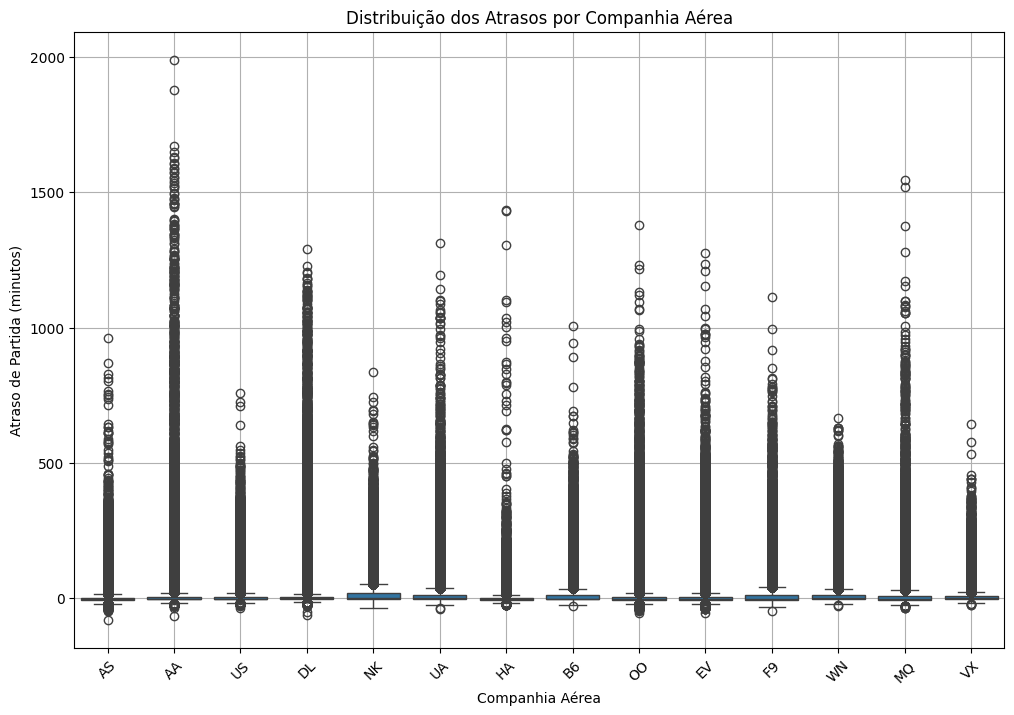

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando os dados (assumindo que os dados já estão carregados em 'flights_data')
# Filtro para remover entradas onde o atraso de partida é nulo
flights_data_filtered = flights_data[flights_data['DEPARTURE_DELAY'].notna()]

# Agrupando os dados por companhia aérea e calculando estatísticas de atraso
delay_stats = flights_data_filtered.groupby('AIRLINE')['DEPARTURE_DELAY'].describe()

# Plotando as estatísticas de atraso para cada companhia aérea
plt.figure(figsize=(12, 8))
sns.boxplot(x='AIRLINE', y='DEPARTURE_DELAY', data=flights_data_filtered)
plt.title('Distribuição dos Atrasos por Companhia Aérea')
plt.xlabel('Companhia Aérea')
plt.ylabel('Atraso de Partida (minutos)')
plt.xticks(rotation=45)  # Rotação dos rótulos para melhor visualização
plt.grid(True)  # Adiciona grade ao gráfico para facilitar a leitura
plt.show()


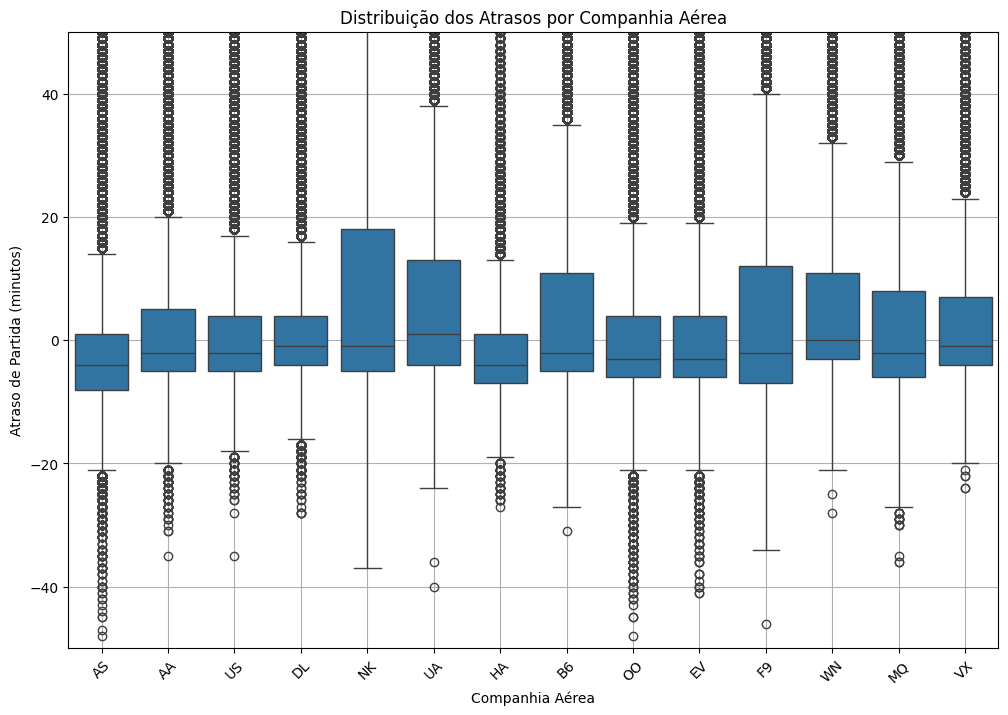

In [31]:
# Zomm in interquartile
# Plotando as estatísticas de atraso para cada companhia aérea
plt.figure(figsize=(12, 8))
sns.boxplot(x='AIRLINE', y='DEPARTURE_DELAY', data=flights_data_filtered)
plt.title('Distribuição dos Atrasos por Companhia Aérea')
plt.xlabel('Companhia Aérea')
plt.ylabel('Atraso de Partida (minutos)')
plt.ylim(-50, 50)
plt.xticks(rotation=45)  # Rotação dos rótulos para melhor visualização
plt.grid(True)  # Adiciona grade ao gráfico para facilitar a leitura
plt.show()

In [32]:
delay_stats

,count,mean,std,min,25%,50%,75%,max
AIRLINE,,,,,,,,
AA,715598.0,8.900856,41.897429,-68.0,-5.0,-2.0,5.0,1988.0
AS,171910.0,1.785801,26.365575,-82.0,-8.0,-4.0,1.0,963.0
B6,262843.0,11.514353,38.517935,-31.0,-5.0,-2.0,11.0,1006.0
DL,872177.0,7.369254,36.337405,-61.0,-4.0,-1.0,4.0,1289.0
EV,557294.0,8.715934,38.680279,-55.0,-6.0,-3.0,4.0,1274.0
F9,90290.0,13.350858,49.510902,-46.0,-7.0,-2.0,12.0,1112.0
HA,76119.0,0.485713,24.550609,-27.0,-7.0,-4.0,1.0,1433.0
MQ,280282.0,10.125188,40.615207,-36.0,-6.0,-2.0,8.0,1544.0
NK,115454.0,15.944766,43.767651,-37.0,-5.0,-1.0,18.0,836.0


Insight from the provided statistics:

### Average Delays
- **Varying Means**: The mean delays across airlines show substantial variation. Spirit Airlines (NK) has the highest average delay at approximately 15.95 minutes, which is considerably higher than the overall average across airlines. This suggests that flights operated by Spirit Airlines tend to have longer wait times before departure.
- **Least Delays**: Hawaiian Airlines (HA) shows an impressively low average delay of only about 0.49 minutes, indicating exceptional punctuality in their flight operations.

### Variability in Delays
- **Standard Deviation**: The standard deviation provides insight into the variability of delay times. Frontier Airlines (F9) has one of the highest standard deviations at around 49.51 minutes, indicating a high variability in their flight departure times. Conversely, Hawaiian Airlines (HA) again shows low variability with a standard deviation of 24.55 minutes.
- **Range**: The maximum delay recorded provides insights into extreme cases where the delay was significantly higher than usual. American Airlines (AA) recorded a maximum delay of 1988 minutes, which is extremely high compared to other airlines.

### Distribution Characteristics
- **Median and Quartiles**:
  - Most airlines have a median delay close to or below zero, which indicates that more than half of their flights depart on time or earlier than scheduled.
  - The interquartile ranges (from Q1 to Q3) are generally tight for most airlines, suggesting that a majority of the flight delays are consistent and not extreme, except for the outliers indicated by high maximum values.

### Potential Factors for Delays
- **Operational Factors**: Airlines with larger fleets and more extensive route networks, such as Delta (DL) and Southwest (WN), might be expected to have higher delays due to the complexity of their operations. However, Delta maintains a lower average delay, suggesting efficient operational management.
- **External Factors**: The extreme delay values might be due to extraordinary circumstances such as weather conditions, technical issues, or airport congestion. Airlines like American (AA) and United (UA) show high maximum delays, which might be influenced by their hub locations in major airports prone to such issues.

### Comparative Analysis
- **Performance Against Industry Average**: Comparing each airline's delay profile against the industry average provides insights into their operational efficiency. Airlines like Hawaiian (HA) and Alaska (AS) perform well above average, which could be attractive to travelers looking for reliability.

### Insights for Travelers and Management
- **Choosing Airlines**: For travelers, choosing airlines like Hawaiian or Alaska might lead to a generally more on-time experience.
- **Operational Improvements**: Airlines with high variability and extreme delays could look into logistical improvements or buffer strategies to manage or mitigate delays.


### **Relationship Between Flight Distance and Delays**

- Create a scatter plot that relates flight distance to departure delay.
- Identify any visible trends or patterns.

In [33]:
# !pip install datashader holoviews

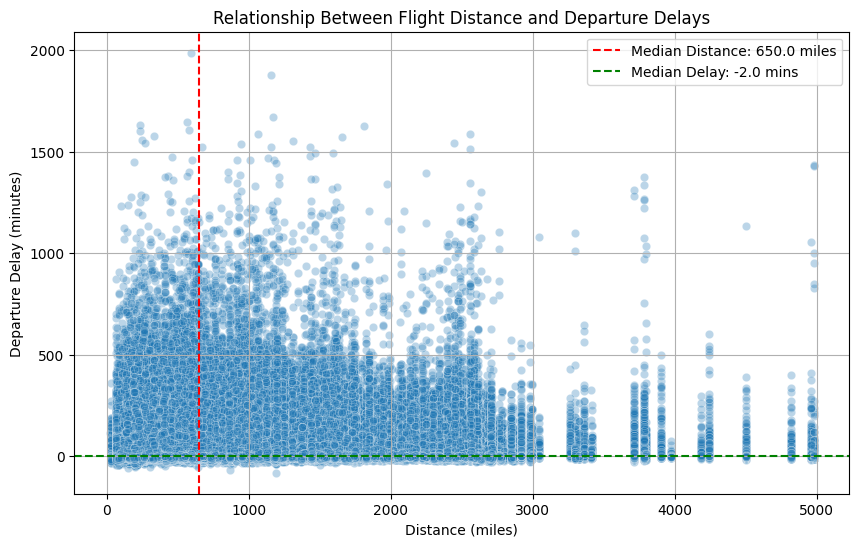

Correlation coefficient between distance and departure delay: 0.024
           DISTANCE  DEPARTURE_DELAY
count  5.732926e+06     5.732926e+06
mean   8.247621e+02     9.370158e+00
std    6.087941e+02     3.708094e+01
min    2.100000e+01    -8.200000e+01
25%    3.730000e+02    -5.000000e+00
50%    6.500000e+02    -2.000000e+00
75%    1.065000e+03     7.000000e+00
max    4.983000e+03     1.988000e+03


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure there are no missing values in the DISTANCE and DEPARTURE_DELAY columns
flights_data_filtered = flights_data.dropna(subset=['DISTANCE', 'DEPARTURE_DELAY'])

# Creating the scatter plot
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='DISTANCE', y='DEPARTURE_DELAY', data=flights_data_filtered, alpha=0.3)

# Adding median lines to the plot
median_distance = flights_data_filtered['DISTANCE'].median()
median_delay = flights_data_filtered['DEPARTURE_DELAY'].median()
plt.axvline(median_distance, color='r', linestyle='--', label=f'Median Distance: {median_distance} miles')
plt.axhline(median_delay, color='g', linestyle='--', label=f'Median Delay: {median_delay} mins')

# Enhance visualization
plt.title('Relationship Between Flight Distance and Departure Delays')
plt.xlabel('Distance (miles)')
plt.ylabel('Departure Delay (minutes)')
plt.legend()  # Show legend
plt.grid(True)  # Adding grid for better readability

# Display the plot
plt.show()

# Calculating and printing the Pearson correlation coefficient
correlation_coefficient = flights_data_filtered['DISTANCE'].corr(flights_data_filtered['DEPARTURE_DELAY'])
print(f"Correlation coefficient between distance and departure delay: {correlation_coefficient:.3f}")

# Optional: Print summary statistics for distance and departure delay
print(flights_data_filtered[['DISTANCE', 'DEPARTURE_DELAY']].describe())


In [37]:
# Calculating Pearson correlation coefficient on the sample
correlation = flights_data_filtered['DISTANCE'].corr(flights_data_filtered['DEPARTURE_DELAY'])
print(f"Correlation coefficient between distance and departure delay: {correlation}")

Correlation coefficient between distance and departure delay: 0.024106141413400416


A detailed analysis of the relationship between flight distance and departure delays:

### Correlation Coefficient
- **Value: 0.024** - This correlation coefficient is very close to zero, indicating a very weak positive linear relationship between flight distance and departure delay. Essentially, this suggests that as flight distance increases, there is a negligible increase in departure delays, but the effect is so small that it may not be of practical significance.

### Summary Statistics Analysis
- **Distance**:
  - **Mean**: The average flight distance is approximately 825 miles, with a standard deviation of 609 miles. This wide standard deviation indicates a substantial variation in flight distances.
  - **Range**: Flight distances vary from as short as 21 miles to as long as 4983 miles. This wide range shows the diversity in flight lengths, from short hops to long-haul flights.
  - **Median (650 miles)**: The median distance is less than the mean, suggesting a right-skewed distribution of flight distances. Most flights are clustered on the shorter end of the spectrum.

- **Departure Delay**:
  - **Mean**: The average departure delay is approximately 9.37 minutes. However, given the high standard deviation of about 37 minutes, this average might be influenced by extreme values or outliers.
  - **Range**: Delays range from -82 minutes (indicating early departures) to 1988 minutes (extremely delayed flights).
  - **Median (-2 minutes)**: The median delay is slightly negative, which means more than half of the flights leave on time or slightly early.

### Insights and Implications
- **Weak Relationship**: The very weak positive correlation between flight distance and delay implies that other factors (not the flight distance) play a more significant role in determining departure delays. Factors could include airport traffic, airline efficiency, weather conditions, and more.
- **Operational Insights**: Airlines and airports might not need to focus on flight distance as a determinant for delays but rather on operational efficiencies and external conditions affecting specific routes or times.
- **Strategic Planning**: For strategic operations, understanding that delays are not significantly influenced by the distance could help in planning flight schedules, managing gate assignments, and staffing without overly concerning about the flight's length.

### Recommendations for Further Analysis
- **Investigate Other Factors**: Analyzing other variables such as time of day, airport congestion, and airline-specific operations might provide more insights into the causes of delays.
- **Segmented Analysis**: Examining delays within categories of flight distances (short-haul vs. long-haul) might reveal patterns that the overall correlation misses.
- **Advanced Statistical Models**: Using multivariate regression or machine learning models could help uncover complex relationships between delays and multiple predictors simultaneously.


### **Delays by Airline**

- Visualize how delays vary throughout the day.
- Consider showing the average delays by hour of departure.

Data used for plotting average delays by hour across airlines:


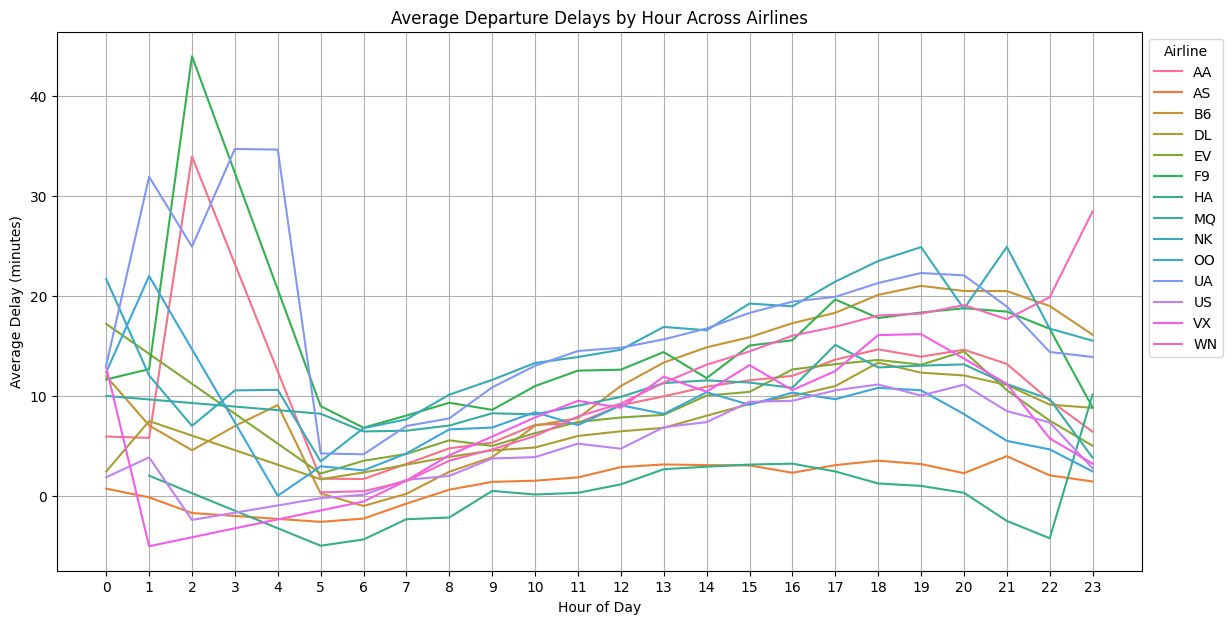

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract hour from SCHEDULED_DEPARTURE if it's in HHMM format as integer
# If SCHEDULED_DEPARTURE is a string, you might need to convert it to integer first
flights_data['DEPARTURE_HOUR'] = (flights_data['SCHEDULED_DEPARTURE'] // 100).astype(int)

# Calculating average delays by airline and hour
average_delays = flights_data.groupby(['AIRLINE', 'DEPARTURE_HOUR'])['DEPARTURE_DELAY'].mean().reset_index()

# Print the data used for the plot
print("Data used for plotting average delays by hour across airlines:")

# Pivot the data for easier plotting
pivot_delays = average_delays.pivot(index="DEPARTURE_HOUR", columns="AIRLINE", values="DEPARTURE_DELAY")

# Plotting
plt.figure(figsize=(14, 7))
sns.lineplot(data=pivot_delays, dashes=False)
plt.title('Average Departure Delays by Hour Across Airlines')
plt.xlabel('Hour of Day')
plt.ylabel('Average Delay (minutes)')
plt.xticks(range(0, 24))  # Ensure all hours are shown
plt.grid(True)
plt.legend(title='Airline', loc='upper left', bbox_to_anchor=(1, 1))  # Move legend out of the plot
plt.show()




Insights:

### General Observations:
1. **Variable Delay Patterns Across Airlines:** Delays vary significantly both across different airlines and throughout the day for each airline. This variation suggests that each airline's operational efficiency and scheduling could significantly impact delay times.

2. **Nighttime and Early Morning Trends:**
   - **Lower Delays Late at Night:** For most airlines, delays tend to be lower during late-night hours (post-midnight to early morning). This is likely due to reduced airport congestion and fewer operational disruptions during these hours.
   - **Spike in Delays in Early Morning Hours:** Some airlines show an increase in delays around the early hours (e.g., around 2 AM to 5 AM), possibly due to logistics of morning rush preparations or the cascading effects of previous day's delays.

3. **Peak Hours:**
   - **Mid-Day and Evening Peaks:** There is a noticeable increase in delays from mid-morning to evening (from around 10 AM to 8 PM). This period likely coincides with higher air traffic and operational constraints due to peak travel times.

### Specific Airline Insights:
- **American Airlines (AA):** Delays increase steadily throughout the day, peaking in the evening hours around 6 PM to 8 PM. This pattern suggests a buildup of delays likely exacerbated by the cumulative effects of daily operations and peak traffic.
- **Alaska Airlines (AS):** Exhibits relatively minor delays, with a slight increase in the afternoon but generally maintains lower delay times, suggesting efficient operations and possibly less congestion at their primary hubs.
- **JetBlue (B6):** Shows increasing delays as the day progresses, with particularly high delays in the late evening, possibly reflecting their flight schedules and airport traffic dynamics.
- **Delta Airlines (DL):** Delays increase through the day, peaking in the late afternoon and early evening. Delta manages to keep delays relatively lower in the early morning, suggesting effective management of morning operations.
- **Spirit Airlines (NK):** Notable for higher delays, especially in the late evening, indicating potential operational challenges or scheduling issues during peak hours.
- **United Airlines (UA):** Similar to others, with delays peaking in the late evening. High early morning delays could also indicate issues with overnight logistics and scheduling.

### Broader Implications:
- **Operational Efficiency:** Airlines like Alaska show an ability to maintain lower delays which could be indicative of less congestion at their main hubs or more efficient operational practices.
- **Schedule Management:** Airlines with increasing delays throughout the day may need to reassess their flight scheduling and hub management to mitigate the compounding effects of delays.
- **Customer Satisfaction:** Persistent delays, especially during peak travel times, can significantly impact traveler satisfaction and operational costs.

### Recommendations for Further Analysis:
- **Causal Factors:** Investigate specific causes of delays (e.g., weather, technical issues, airport congestion) to better understand underlying factors.
- **Impact of Airport:** Examine delay patterns in relation to specific airports to determine if certain locations contribute more significantly to delays.
- **Time Series Forecasting:** Employ forecasting models to predict delays more accurately and improve scheduling and resource allocation.


### **Map of Delays by Airport**

- Create a map visualization showing the location of airports with the quantity or percentage of delays.
- This may involve integrating geographical data of airports with flight delays.

In [39]:
# !pip install matplotlib basemap pandas


In [40]:
# Assuming 'DEPARTURE_DELAY' > 0 indicates a delay
flights_data['is_delayed'] = flights_data['DEPARTURE_DELAY'] > 0
# Aggregate delay data by airport
"""
Using the mean allows for easy interpretation of the delay percentage. The mean of a binary variable (0 for
no delay, 1 for delay) directly represents the proportion of occurrences where the event (delay) happens. In
this case, it represents the proportion of flights that are delayed out of all flights departing from a
particular airport.
"""
delay_data = flights_data.groupby('ORIGIN_AIRPORT')['is_delayed'].agg(['mean', 'count']).reset_index()
delay_data.rename(columns={'mean': 'delay_percentage', 'count': 'total_flights'}, inplace=True)

# Merge delay data with airport data
airport_delays = pd.merge(airports_data, delay_data, left_on='IATA_CODE', right_on='ORIGIN_AIRPORT')


In [41]:
airport_delays.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,ORIGIN_AIRPORT,delay_percentage,total_flights
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040,ABE,0.268250,2274
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190,ABI,0.239158,2329
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919,ABQ,0.364266,19192
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183,ABR,0.208644,671
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447,ABY,0.232877,876


In [42]:
# Ordenar por porcentagem de atrasos de forma decrescente
sorted_by_delay_desc = airport_delays[["AIRPORT", "CITY", "LATITUDE", "LONGITUDE", "delay_percentage", "total_flights"]].sort_values(by="delay_percentage", ascending=False)
print(sorted_by_delay_desc)

# Ordenar por porcentagem de atrasos de forma crescente
sorted_by_delay_asc = airport_delays[["AIRPORT", "CITY", "LATITUDE", "LONGITUDE", "delay_percentage", "total_flights"]].sort_values(by="delay_percentage", ascending=True)
print(sorted_by_delay_asc)

# Ordenar por total de voos de forma decrescente
sorted_by_flights_desc = airport_delays[["AIRPORT", "CITY", "LATITUDE", "LONGITUDE", "delay_percentage", "total_flights"]].sort_values(by="total_flights", ascending=False)
print(sorted_by_flights_desc)

# Ordenar por total de voos de forma crescente
sorted_by_flights_asc = airport_delays[["AIRPORT", "CITY", "LATITUDE", "LONGITUDE", "delay_percentage", "total_flights"]].sort_values(by="total_flights", ascending=True)
print(sorted_by_flights_asc)


                               AIRPORT              CITY  LATITUDE  LONGITUDE  \
137         Guam International Airport             Agana  13.48345 -144.79598   
133                   Gustavus Airport          Gustavus  58.42438 -135.70738   
9                         Adak Airport              Adak  51.87796 -176.64603   
154                 Wilmington Airport        Wilmington  39.67872  -75.60653   
219          Martha's Vineyard Airport  Marthas Vineyard  41.39303  -70.61433   
..                                 ...               ...       ...        ...   
242         Pocatello Regional Airport         Pocatello  42.91131 -112.59586   
189  Lewiston-Nez Perce County Airport          Lewiston  46.37450 -117.01539   
98               Elko Regional Airport              Elko  40.82493 -115.79170   
70                   Canyonlands Field              Moab  38.75496 -109.75484   
314                     Valdez Airport            Vernal  40.44090 -109.50992   

     delay_percentage  tota

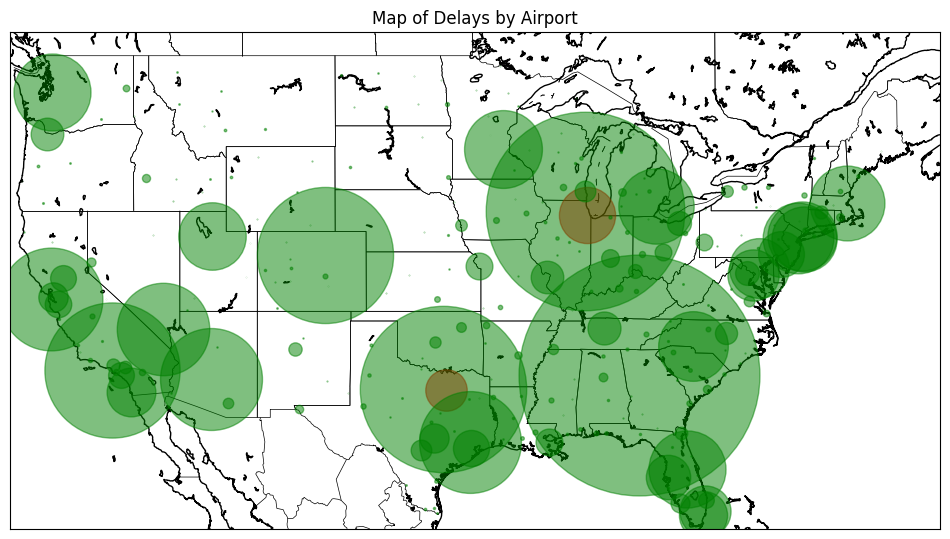

In [43]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(12, 8))
map = Basemap(projection='merc', llcrnrlat=25, urcrnrlat=50, llcrnrlon=-125, urcrnrlon=-65, lat_ts=20, resolution='i')
map.drawcoastlines()
map.drawcountries()
map.drawstates()

# Plotting each airport; size reflects the number of flights, color reflects delay percentage
for index, row in airport_delays.iterrows():
    x, y = map(row['LONGITUDE'], row['LATITUDE'])
    size = row['total_flights'] * 0.0005  # Scale size for visibility
    color = 'red' if row['delay_percentage'] > 0.5 else 'green'  # Delay more than 50%
    map.plot(x, y, 'o', markersize=size, color=color, alpha=0.5)

plt.title('Map of Delays by Airport')
plt.show()


# **Insights**

### Analysis of Airports with the Highest Delay Percentages
Airports such as Guam International Airport and Gustavus Airport exhibit significantly high delay percentages, which may indicate specific issues at these locations, such as adverse weather conditions, limited airport capacity, or operational challenges. Interestingly, these airports generally handle fewer flights, which could amplify the impact of any delays on their overall statistics.

### Analysis of Airports with the Lowest Delay Percentages
Conversely, airports like Valdez Airport and Canyonlands Field, which have the lowest percentages of delays, demonstrate more efficient operations or fewer external problems affecting them. The relatively low volume of flights at these airports might also contribute to their ability to maintain a consistent schedule.

### Analysis of Airports with the Highest Volumes of Flights
Airports with large volumes of flights, such as Hartsfield-Jackson Atlanta and Chicago O'Hare, show significant operational capacity, despite also having high percentages of delays. The operational complexity and the sheer number of flights managed at these hubs likely contribute to these delays, although these airports are vital for the global air transport network.

### Analysis of Airports with the Lowest Volumes of Flights
Airports managing fewer flights, like Ithaca Tompkins Regional and King Salmon Airport, have low traffic volumes that may facilitate more controlled operations. However, any delays significantly impact their percentage calculations due to the low base number of flights.



### **Temporal Analysis of Delays**
- Analyze how flight delays varied throughout the year 2015.
- Create a line or bar chart showing the monthly variation of delays.

In [55]:
#  Average Delay per Month
query = """
SELECT MONTH, AVG(DEPARTURE_DELAY) as avg_delay
FROM flights
GROUP BY MONTH
ORDER BY MONTH;
"""

# Execute the query and load into a DataFrame
monthly_delays = pd.read_sql_query(query, conn)


In [56]:
print(monthly_delays)


    MONTH  avg_delay
0       1   9.759471
1       2  11.885284
2       3   9.660903
3       4   7.721885
4       5   9.454144
5       6  13.986016
6       7  11.394664
7       8   9.932045
8       9   4.823560
9      10   4.982661
10     11   6.944197
11     12  11.783529


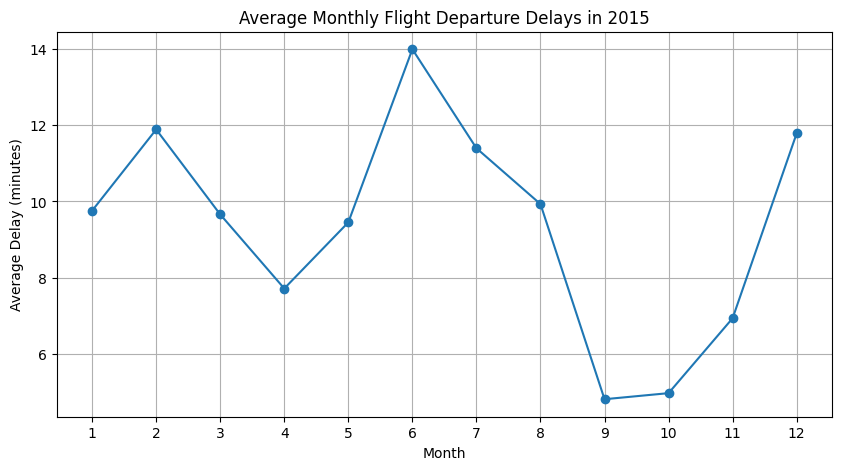

In [59]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_delays['MONTH'], monthly_delays['avg_delay'], marker='o')
plt.title('Average Monthly Flight Departure Delays in 2015')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.xticks(range(1, 13))  # Ensures all months are labeled
plt.grid(True)
plt.show()


### Analysis of Monthly Delays

- **January (9.76 minutes)** and **March (9.66 minutes)**: These months show moderate delay averages, which might be influenced by winter weather conditions affecting flight schedules, particularly in regions prone to snow and storms.

- **February (11.88 minutes)** and **December (11.78 minutes)**: These months exhibit higher delays, likely due to severe winter weather. February, being notorious for blizzards in many parts of the United States, often sees significant travel disruptions. December similarly experiences high delays due to both winter weather and increased holiday travel volumes.

- **April (7.72 minutes)**: This month shows a decrease in delays, possibly due to more stable spring weather and fewer travel disruptions compared to winter months.

- **May (9.45 minutes)**: The slight increase in delays over April could be attributed to the beginning of the travel season, with more flights and potentially more issues in scheduling and operations.

- **June (13.99 minutes)** and **July (11.39 minutes)**: These months show some of the highest delays of the year, which can be attributed to a combination of factors including summer storms, air traffic increases due to summer travel, and operational challenges that airlines face during peak travel periods.

- **August (9.93 minutes)**: There is a slight reduction in delays compared to June and July, but the delays are still relatively high, possibly continuing the trend from the summer travel peak.

- **September (4.82 minutes)** and **October (4.98 minutes)**: These months show the lowest delays of the year. This improvement could be due to less severe weather, lower volumes of air traffic following the end of summer travel, and airlines recovering efficiency after the hectic summer months.

- **November (6.94 minutes)**: Delays increase slightly, potentially due to Thanksgiving holiday travel, which is one of the busiest travel times in the U.S.

### Potential Further Analysis

- **Weather Data Correlation**: Analyzing how specific weather conditions correlate with delays could provide deeper insights into causative factors for delays.
- **Airport-Specific Analysis**: Breaking down the delays by major airports could reveal specific operational challenges or successes.
- **Airline-Specific Trends**: Looking at delays by airline could uncover different management strategies and their effectiveness.



# 3. Machine Learning Model Training

## Instructions for the Machine Learning Model Training Module

### Model Objective:
- Develop a Machine Learning model to predict flight delays. The target could be a binary variable indicating whether a flight will be delayed by more than 15 minutes, for example.

### Data Preprocessing:
- Perform data cleaning and preparation. This should include handling missing values, encoding categorical variables, normalizing or standardizing numerical variables, and possibly creating new features (feature engineering).

- Justify the preprocessing choices.

### Data Split:
- Divide the data into training and test sets.

### Model Selection and Training:
- Choose an appropriate model (e.g., logistic regression, decision trees, random forest, etc.).
- Train the model and optimize hyperparameters.

### Model Evaluation:
- Evaluate the model using appropriate metrics such as accuracy, recall, F1-score, AUC-ROC, etc.
- Provide an interpretation of the results and metrics.

### Insights and Improvements:
- Discuss possible insights gained from the model and suggestions for future improvements.

### Additional Considerations:
- You could use libraries like scikit-learn, XGboost, TensorFlow, or PyTorch, depending on the desired complexity level.
- Document each step, including the model choice and justification, as well as the interpretation of results.
- Consider asking for further exploration, like variable importance analysis or model error diagnostics.

<Axes: >

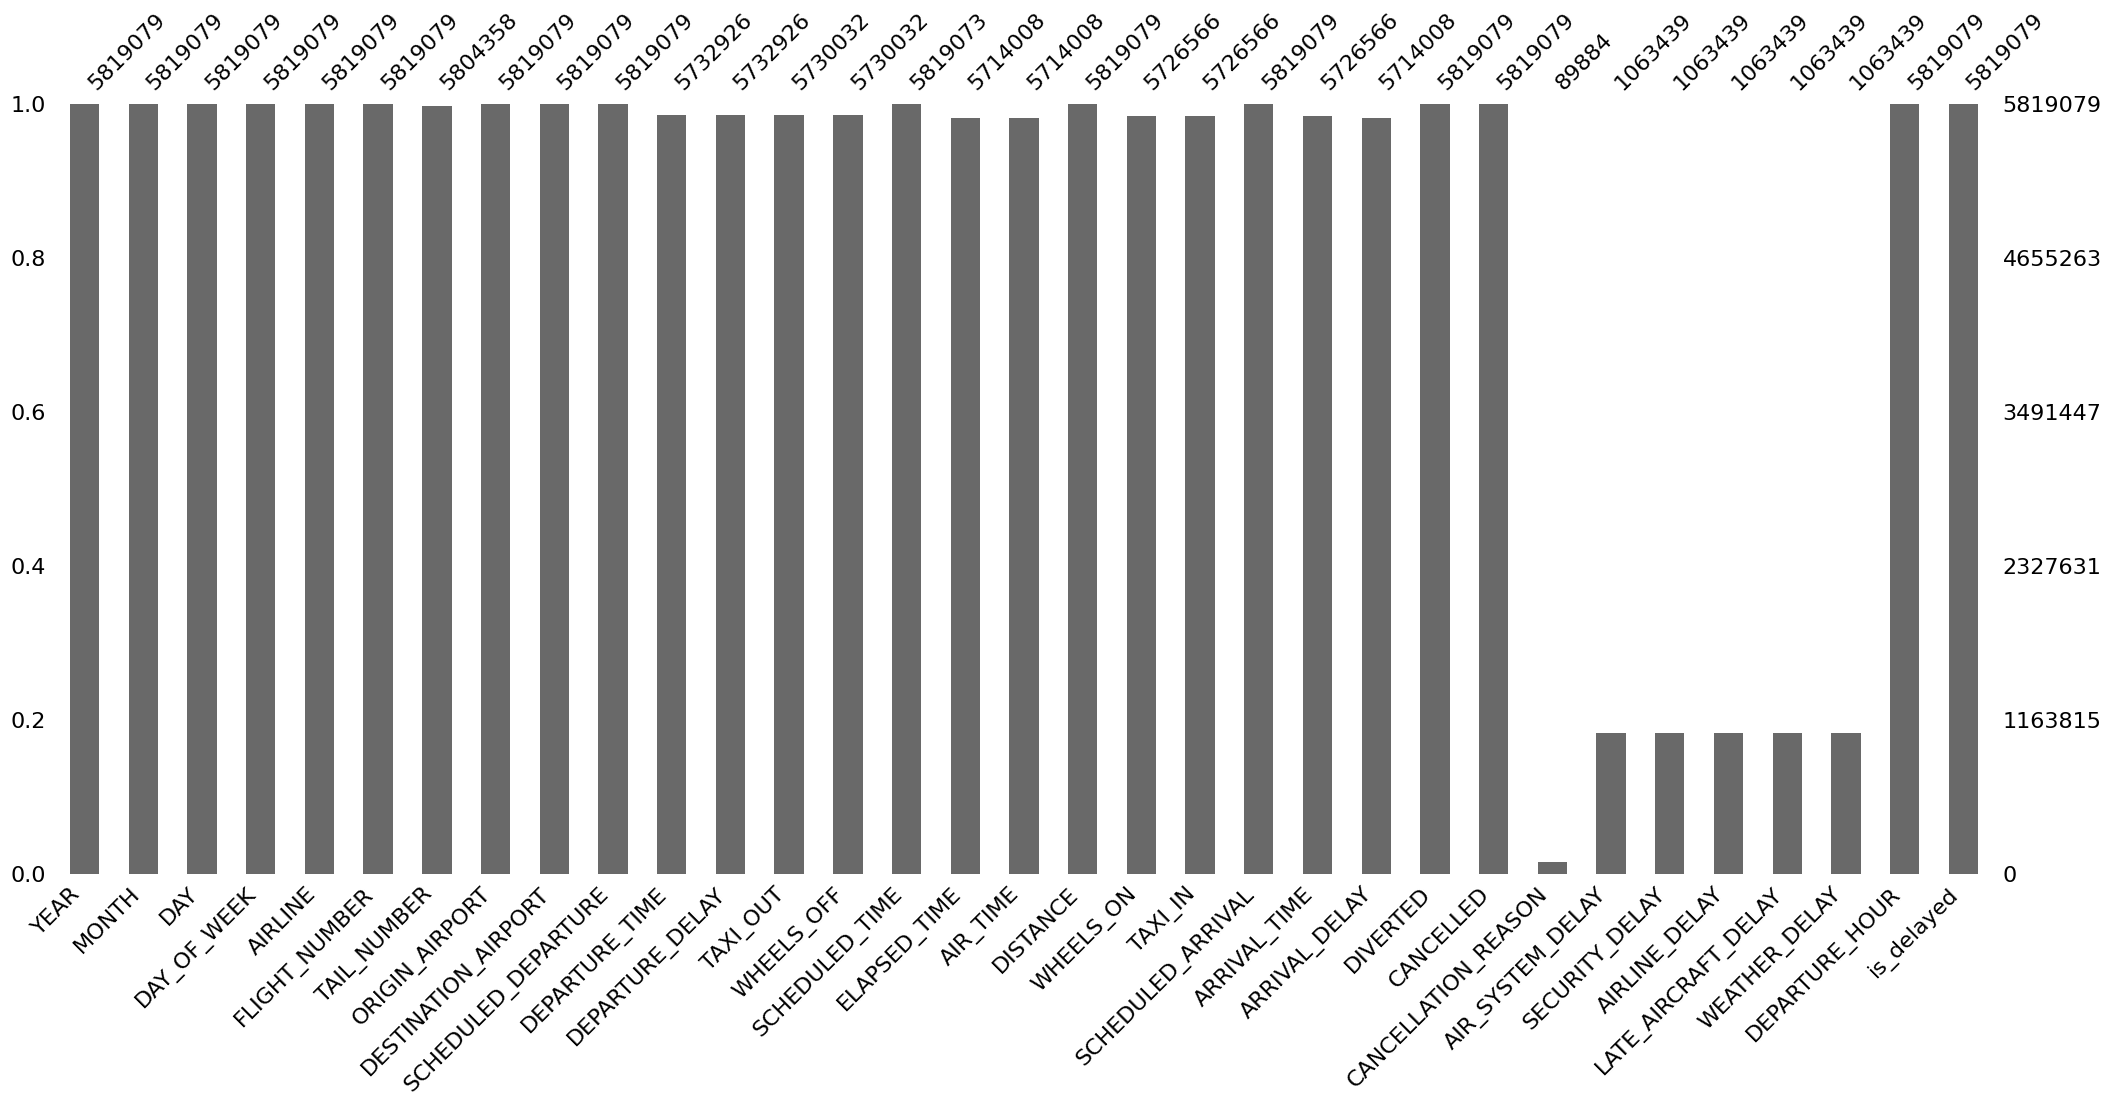

In [63]:
# Missing values
mn.bar(flights_data)

In [11]:
print("Data Types and Missing Values:")
print(flights_data.info())

print("\nFirst 5 Rows of the Dataset:")
print(flights_data.head())

print("\nSummary Statistics for Numerical Features:")
print(flights_data.describe())

print("\nSummary Statistics for Categorical Features:")
print(flights_data.describe(include=['O']))


Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  D

### Key Observations

1. **Missing Values**: Several columns such as `DEPARTURE_TIME`, `DEPARTURE_DELAY`, `AIR_SYSTEM_DELAY`, `SECURITY_DELAY`, `AIRLINE_DELAY`, `LATE_AIRCRAFT_DELAY`, and `WEATHER_DELAY` have missing values. These need to be addressed either through imputation or removal depending on their significance to the delay prediction.

2. **Data Types**: Your dataset contains a mix of numerical (`int64`, `float64`), categorical (`object`), and boolean (`bool`) data types. Proper encoding of categorical variables and normalization or standardization of numerical variables will be crucial.

3. **Redundant or Irrelevant Features**: Columns like `YEAR` (constant 2015 across all entries), and possibly `TAIL_NUMBER` (high cardinality with low predictive power), may not be useful for the model and could be dropped to simplify the model.

4. **High Cardinality in Categorical Variables**: Columns such as `AIRLINE`, `ORIGIN_AIRPORT`, and `DESTINATION_AIRPORT` might have many unique values, which could pose challenges for encoding. Considering dimensionality reduction techniques or embedding layers (if using deep learning) might be beneficial.


In [8]:
# !pip show feature_engine
# !pip install --upgrade feature_engine


In [8]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

In [9]:


# Verifica se uma GPU está disponível
print("GPU disponível:", tf.test.is_gpu_available())

# Lista os dispositivos disponíveis
print("Lista de dispositivos:", tf.config.list_physical_devices('GPU'))


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


GPU disponível: True
Lista de dispositivos: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [10]:
# Determine high and low cardinality columns dynamically
def determine_cardinality_features(df, threshold=30):


    # Identify numeric and categorical columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    print("Numeric columns:", numeric_cols)
    print("Categorical columns:", categorical_cols)

    high_cardinality_cols = [col for col in df[categorical_cols].columns if df[col].nunique() > threshold]
    low_cardinality_cols = [col for col in df[categorical_cols].columns if df[col].nunique() <= threshold]
    return high_cardinality_cols, low_cardinality_cols

high_cardinality_cols, low_cardinality_cols = determine_cardinality_features(flights_data)
print("High cardinality columns:", high_cardinality_cols)
print("Low cardinality columns:", low_cardinality_cols)

Numeric columns: ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
Categorical columns: ['AIRLINE', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'CANCELLATION_REASON']
High cardinality columns: ['TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
Low cardinality columns: ['AIRLINE', 'CANCELLATION_REASON']


In [11]:
# Assuming 'flights_data' is your DataFrame loaded with data

# Calculating the percentage of missing values
missing_values = flights_data.isnull().mean() * 100
print("Percentage of Missing Values per Column:\n", missing_values.sort_values(ascending=False))

# Identifying columns where the percentage of missing values is greater than 50%
high_missing_columns = missing_values[missing_values > 50].index.tolist()

# Identifying the variability of columns
variability = flights_data.nunique(dropna=False)
print("Variability of Columns:\n", variability.sort_values())

# Columns with constant or nearly constant values may not be useful
low_variability_threshold = 1  # You can adjust this threshold based on your specific needs
low_variability_columns = variability[variability <= low_variability_threshold].index.tolist()
print("Columns with Low Variability:", low_variability_columns)

# Combining criteria for removing columns: low variability, irrelevant columns, or high missing values
# Instead of manually specifying 'YEAR', 'FLIGHT_NUMBER', 'TAIL_NUMBER', we generalize to any low variability columns
columns_to_drop = set(low_variability_columns + high_missing_columns + high_cardinality_cols)

# Removing the identified columns from the DataFrame
flights_data = flights_data.drop(columns=list(columns_to_drop))
print("Columns Dropped:", columns_to_drop)


Percentage of Missing Values per Column:
 CANCELLATION_REASON    98.455357
LATE_AIRCRAFT_DELAY    81.724960
WEATHER_DELAY          81.724960
AIRLINE_DELAY          81.724960
AIR_SYSTEM_DELAY       81.724960
SECURITY_DELAY         81.724960
ELAPSED_TIME            1.805629
AIR_TIME                1.805629
ARRIVAL_DELAY           1.805629
WHEELS_ON               1.589822
TAXI_IN                 1.589822
ARRIVAL_TIME            1.589822
WHEELS_OFF              1.530259
TAXI_OUT                1.530259
DEPARTURE_TIME          1.480526
DEPARTURE_DELAY         1.480526
TAIL_NUMBER             0.252978
SCHEDULED_TIME          0.000103
DESTINATION_AIRPORT     0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
MONTH                   0.000000
ORIGIN_AIRPORT          0.000000
SCHEDULED_DEPARTURE     0.000000
YEAR                    0.000000
SCHEDULED_ARRIVAL       0.000000
DISTANCE                0.000000
D

<Axes: >

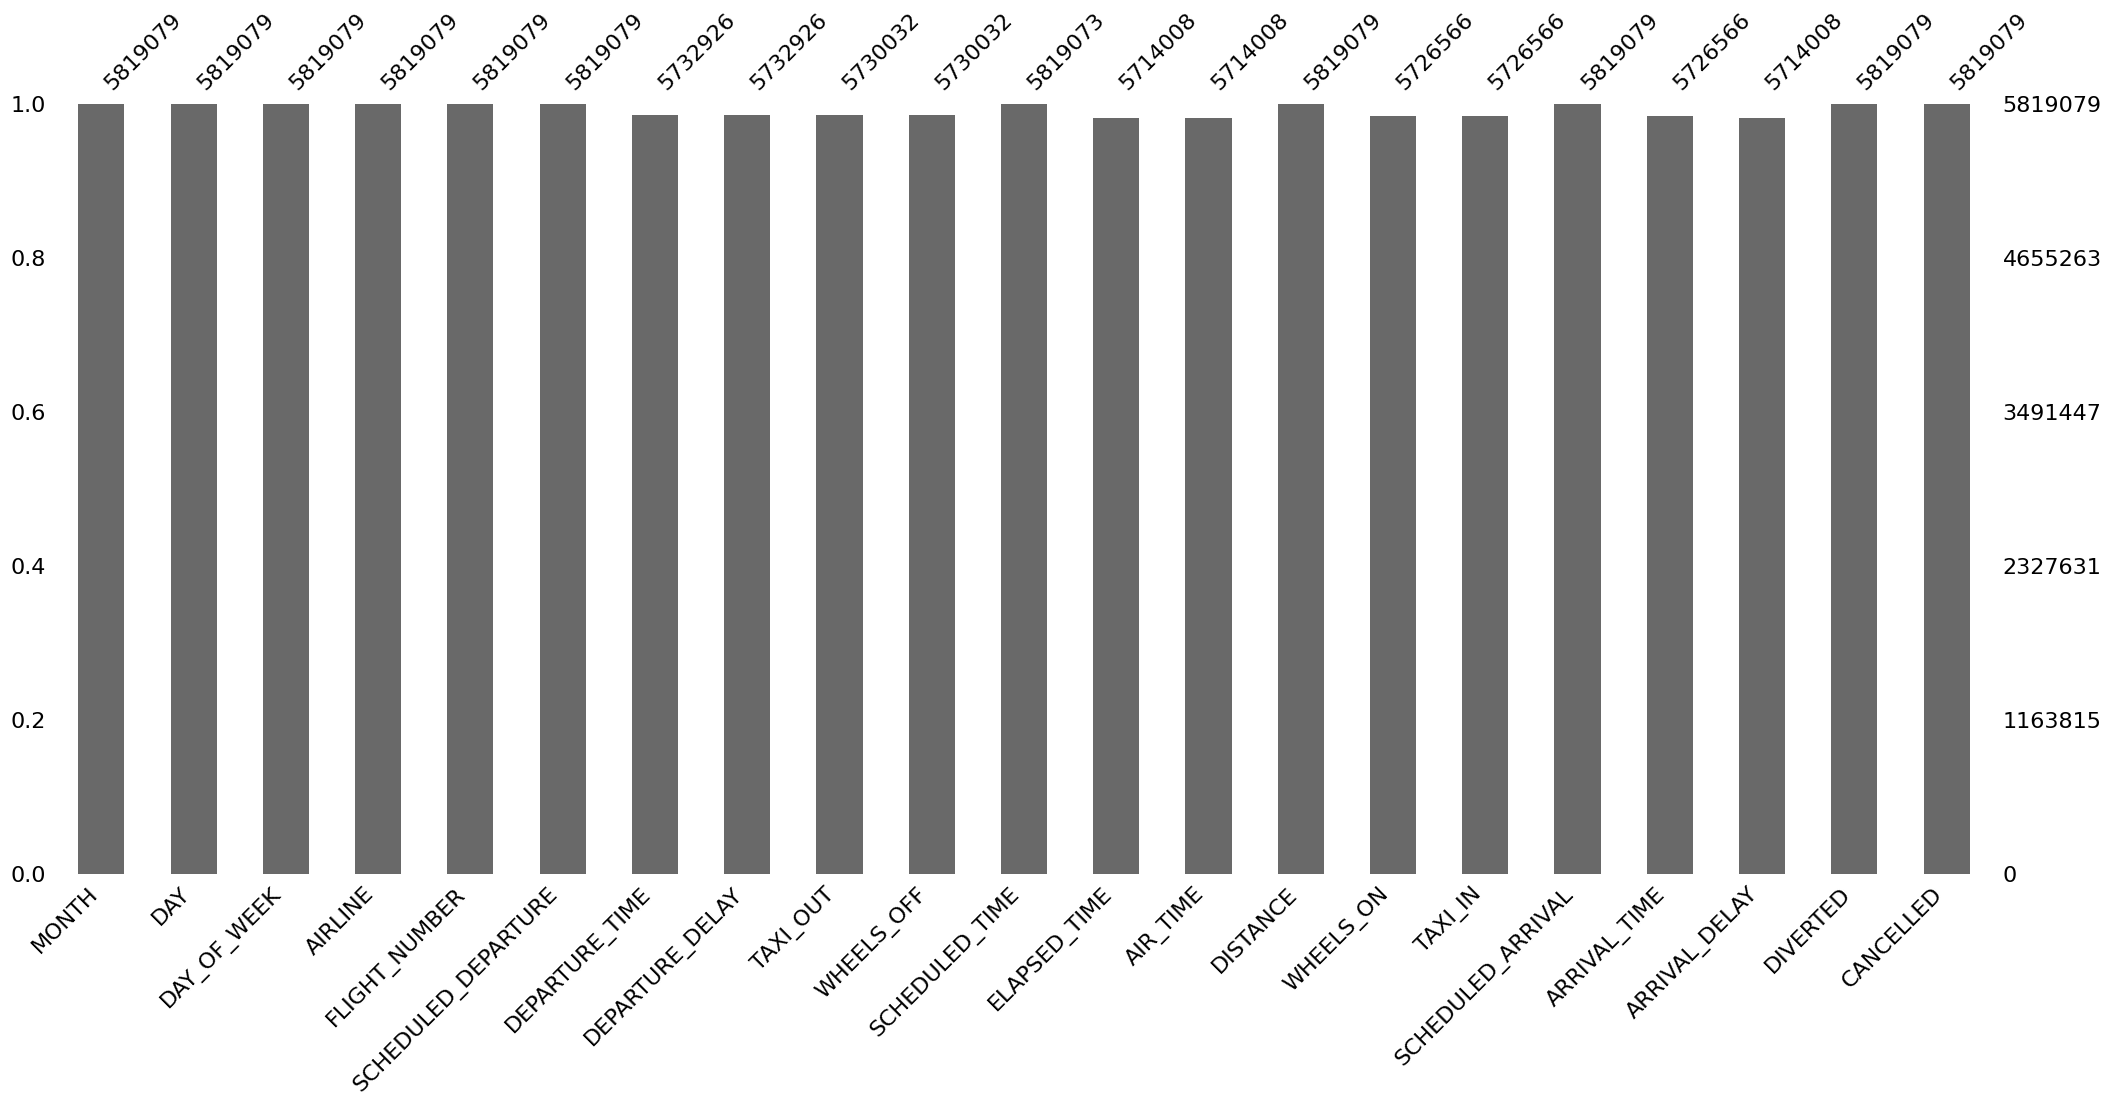

In [12]:
# Missing values
mn.bar(flights_data)

In [13]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from feature_engine.encoding import OneHotEncoder
from feature_engine.imputation import MeanMedianImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

def add_cyclical_features(df):
    """
    Converts month and day to cyclical features considering variable month lengths.

    Args:
    df (DataFrame): DataFrame containing at least the columns 'MONTH' and 'DAY'.

    Returns:
    DataFrame: DataFrame with original data and added cyclical features.
    """
    # Copy the DataFrame to avoid changing the original data
    df = df.copy()

    # Calculate month cyclical features
    df['month_sin'] = np.sin(2 * np.pi * df['MONTH'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['MONTH'] / 12)

    # Determine the maximum number of days in each month for the day cyclical features
    df['day_max'] = df['MONTH'].map({1: 31, 2: 28, 3: 31, 4: 30, 5: 31, 6: 30,
                                     7: 31, 8: 31, 9: 30, 10: 31, 11: 30, 12: 31})
    df['day_sin'] = np.sin(2 * np.pi * df['DAY'] / df['day_max'])
    df['day_cos'] = np.cos(2 * np.pi * df['DAY'] / df['day_max'])

    # Remove the intermediate column 'day_max' after use
    df.drop(columns=['day_max'], inplace=True)

    return df

# Add cyclical features
flights_data = add_cyclical_features(flights_data)



In [14]:
# Model Objective
flights_data['is_delayed'] = (flights_data['DEPARTURE_DELAY'] > 15).astype(int)

# Remove a coluna DEPARTURE_DELAY do DataFrame de features
flights_data = flights_data.drop(columns=['DEPARTURE_DELAY'])

In [15]:
flights_data.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,month_sin,month_cos,day_sin,day_cos,is_delayed
0,1,1,4,AS,98,5,2354.0,21.0,15.0,205.0,...,430,408.0,-22.0,0,0,0.5,0.866025,0.201299,0.97953,0
1,1,1,4,AA,2336,10,2.0,12.0,14.0,280.0,...,750,741.0,-9.0,0,0,0.5,0.866025,0.201299,0.97953,0
2,1,1,4,US,840,20,18.0,16.0,34.0,286.0,...,806,811.0,5.0,0,0,0.5,0.866025,0.201299,0.97953,0
3,1,1,4,AA,258,20,15.0,15.0,30.0,285.0,...,805,756.0,-9.0,0,0,0.5,0.866025,0.201299,0.97953,0
4,1,1,4,AS,135,25,24.0,11.0,35.0,235.0,...,320,259.0,-21.0,0,0,0.5,0.866025,0.201299,0.97953,0


<Axes: >

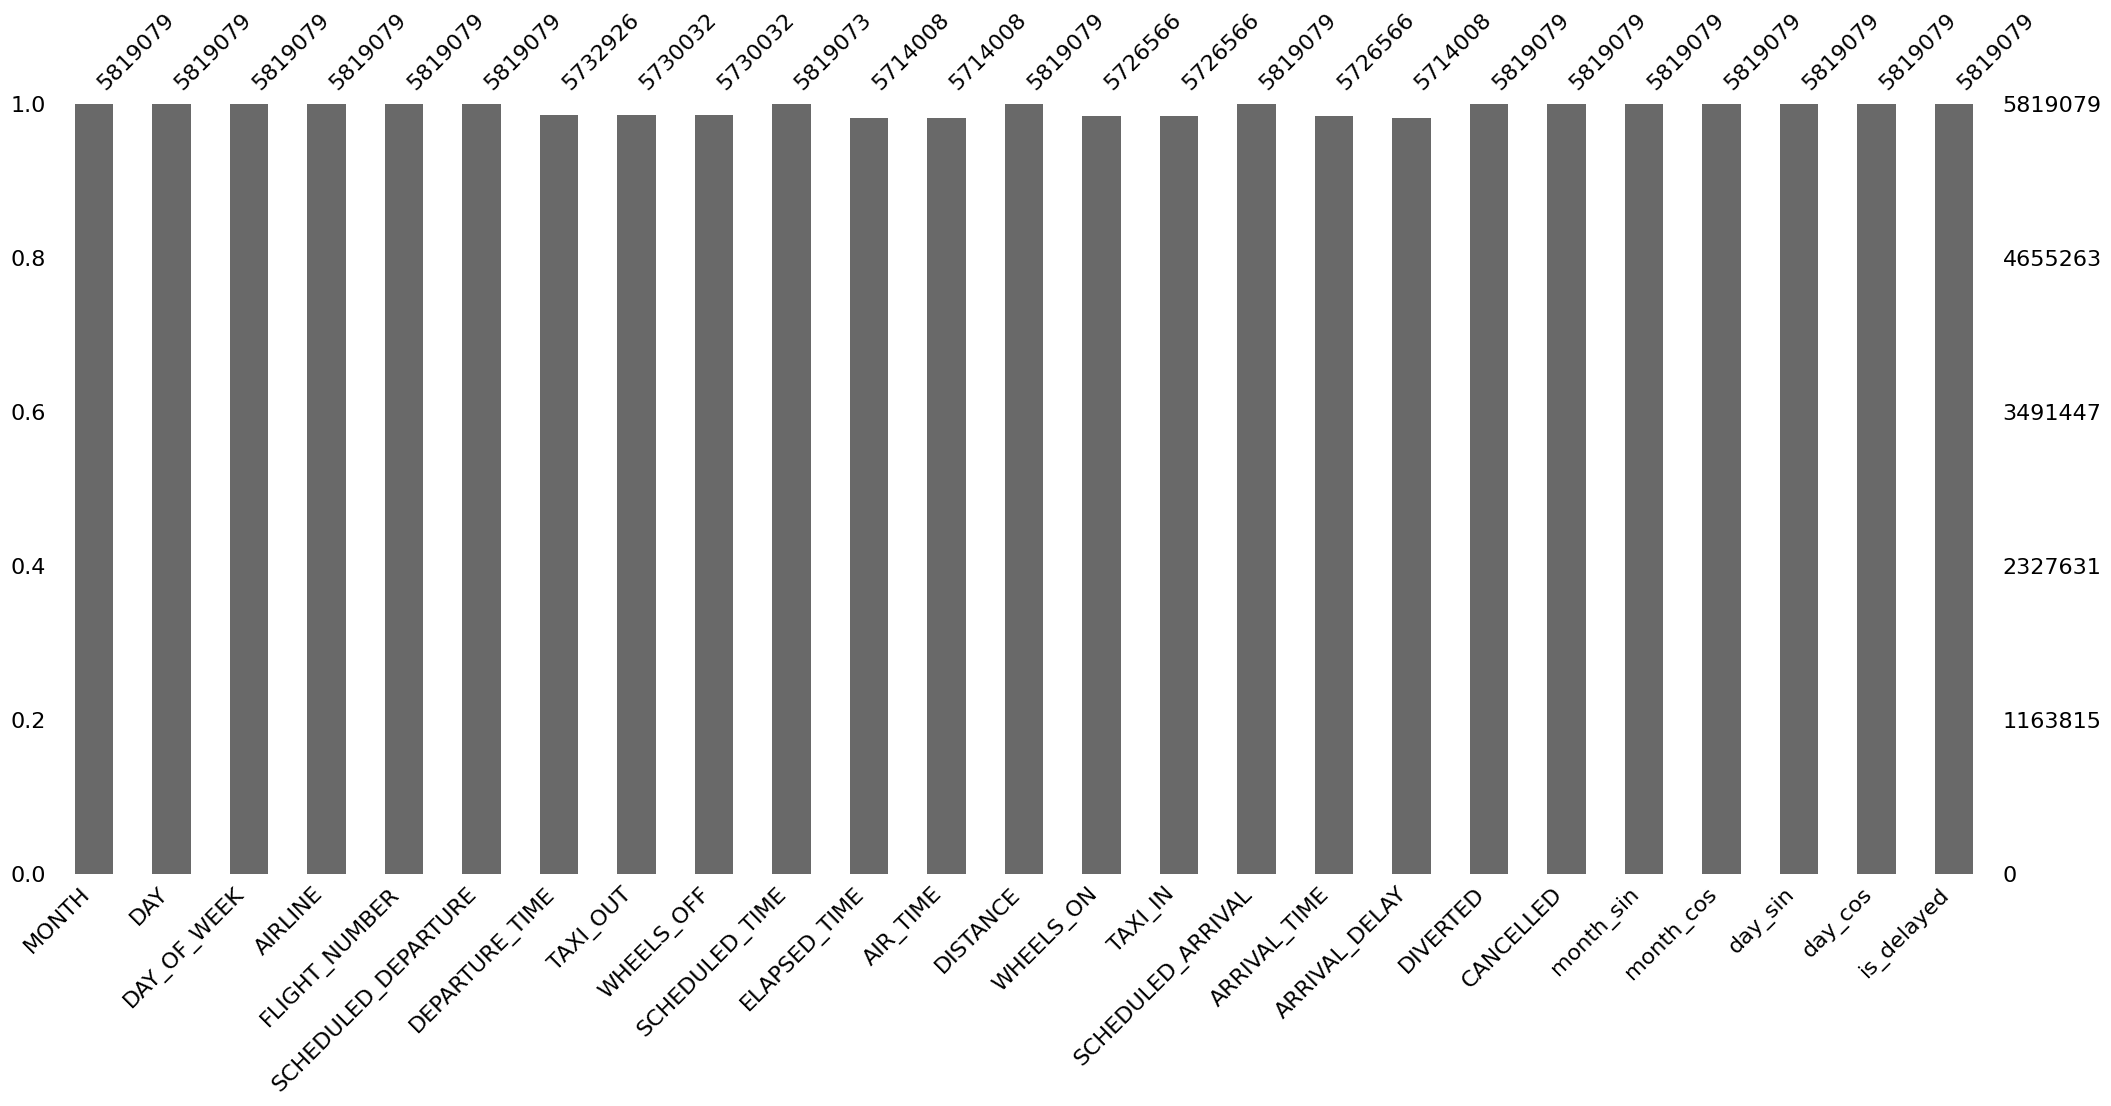

In [16]:
mn.bar(flights_data)

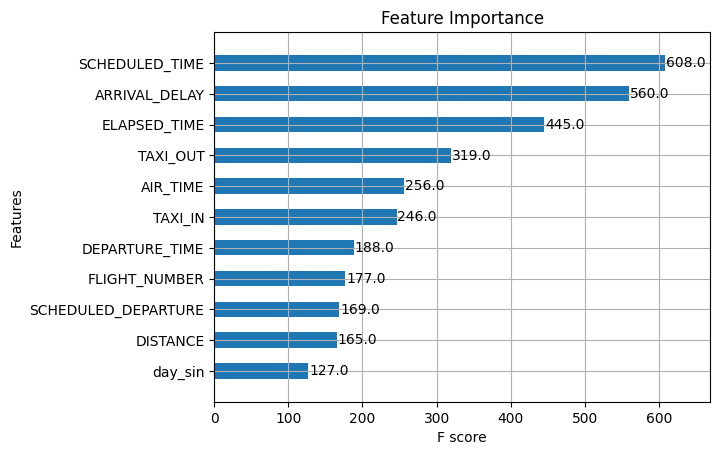

In [19]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from feature_engine.encoding import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Define o DataFrame de features e o target
X = flights_data.drop(['is_delayed'], axis=1)
y = flights_data['is_delayed']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Define o pré-processador de colunas
preprocessor = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), numeric_cols),
    ('cat', OneHotEncoder(), categorical_cols)
], remainder='passthrough')

# Cria o pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False))
])

# Preprocessa os dados
X_train_preprocessed = pipeline.fit_transform(X_train)
X_test_preprocessed = pipeline.transform(X_test)

# Obtém os nomes das colunas após o pré-processamento
feature_names = numeric_cols + pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out()

# Amostra uma fração dos dados para análise inicial de importância das features
sample_frac = 0.005  # 0.5% dos dados
sample_indices = np.random.choice(X_train_preprocessed.shape[0], int(X_train_preprocessed.shape[0] * sample_frac), replace=False)
X_sampled = X_train_preprocessed[sample_indices]
y_sampled = y_train.iloc[sample_indices]

# Transformar dados preprocessados em DMatrix para XGBoost, mantendo os nomes das features
dtrain_sampled = xgb.DMatrix(X_sampled, label=y_sampled, feature_names=feature_names)

# Configuração do modelo XGBoost para usar GPU
params = {
    'objective': 'binary:logistic',
    'tree_method': 'hist',  # Método otimizado para histograma
    'device': 'cuda',  # Especificando o uso de GPU
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'learning_rate': 0.1
}

# Treinar o modelo no conjunto de dados amostrado para análise de importância
model_sampled = xgb.train(params, dtrain_sampled, num_boost_round=100)

# Plotar a importância das features com base no modelo treinado com dados amostrados
xgb.plot_importance(model_sampled, max_num_features=11, height=0.5, importance_type='weight', title='Feature Importance')
plt.show()


In [52]:
# Obtém a importância das features do modelo
importance_dict = model_sampled.get_score(importance_type='weight')

# Converte o dicionário em um DataFrame
importance_df = pd.DataFrame(importance_dict.items(), columns=['Feature', 'Importance'])

# Classifica o DataFrame pela importância das features em ordem decrescente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Imprime o DataFrame
print(importance_df)

                Feature  Importance
8        SCHEDULED_TIME       608.0
16        ARRIVAL_DELAY       560.0
9          ELAPSED_TIME       445.0
6              TAXI_OUT       319.0
10             AIR_TIME       256.0
13              TAXI_IN       246.0
5        DEPARTURE_TIME       188.0
3         FLIGHT_NUMBER       177.0
4   SCHEDULED_DEPARTURE       169.0
11             DISTANCE       165.0
21              day_sin       127.0
12            WHEELS_ON       104.0
1                   DAY        95.0
7            WHEELS_OFF        92.0
14    SCHEDULED_ARRIVAL        87.0
22              day_cos        84.0
20            month_cos        73.0
0                 MONTH        65.0
15         ARRIVAL_TIME        64.0
2           DAY_OF_WEEK        51.0
28           AIRLINE_UA        47.0
19            month_sin        46.0
27           AIRLINE_WN        23.0
26           AIRLINE_DL        21.0
17             DIVERTED        17.0
34           AIRLINE_HA        15.0
33           AIRLINE_AS     

In [23]:
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Após treinar model_sampled e plotar as importâncias
importance_dict = model_sampled.get_score(importance_type='weight')
importance_df = pd.DataFrame(list(importance_dict.items()), columns=['Feature', 'Score']).sort_values(by='Score', ascending=False)

# Excluir 'ARRIVAL_DELAY' das top features, se estiver presente, e pegar as top 10
top_features = importance_df[~importance_df['Feature'].str.contains('ARRIVAL_DELAY')].head(10)['Feature'].tolist()

top_features

['SCHEDULED_TIME',
 'ELAPSED_TIME',
 'TAXI_OUT',
 'AIR_TIME',
 'TAXI_IN',
 'DEPARTURE_TIME',
 'FLIGHT_NUMBER',
 'SCHEDULED_DEPARTURE',
 'DISTANCE',
 'day_sin']

In [21]:
#!pip install scikit-learn==1.0.2

In [30]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.model_selection import HalvingGridSearchCV
import xgboost as xgb

# Prepare the dataset with only the top features
indices = [feature_names.index(f) for f in top_features if f in feature_names]
X_train_top = X_train_preprocessed[:, indices]
X_test_top = X_test_preprocessed[:, indices]

# Define the XGBoost classifier
xgb_model = xgb.XGBClassifier(tree_method='hist', eval_metric='logloss', use_label_encoder=False,
                              objective='binary:logistic', device='cuda')

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Set up HalvingGridSearchCV
halving_search = HalvingRandomSearchCV(estimator=xgb_model, param_distributions=param_grid, scoring='roc_auc',
                                     factor=2, max_resources=100, min_resources=10,
                                     cv=3, n_jobs=-1, verbose=1)

# Fitting Grid Search to the data
halving_search.fit(X_train_top, y_train)

# Get the best model and its performance
best_model = halving_search.best_estimator_
best_params = halving_search.best_params_
best_score = halving_search.best_score_

# Make predictions and evaluate the best model
y_pred_proba = best_model.predict_proba(X_test_top)[:, 1]
y_pred = best_model.predict(X_test_top)


n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 10
max_resources_: 100
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 10
n_resources: 10
Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:984: RuntimeWarning: invalid value encountered in cast
  results["rank_%s" % key_name] = np.asarray(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the train scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


----------
iter: 1
n_candidates: 5
n_resources: 20
Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:984: RuntimeWarning: invalid value encountered in cast
  results["rank_%s" % key_name] = np.asarray(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.65740741 0.65740741
 0.66666667 0.66203704 0.66203704]
  warnings.warn(


----------
iter: 2
n_candidates: 3
n_resources: 40
Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.49074074 0.75462963 0.58333333]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:984: RuntimeWarning: invalid value encountered in cast
  results["rank_%s" % key_name] = np.asarray(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.65740741 0.65740741
 0.66666667 0.66203704 0.66203704 0.94762846 0.95833333 0.8733029 ]
  warnings.warn(


----------
iter: 3
n_candidates: 2
n_resources: 80
Fitting 3 folds for each of 2 candidates, totalling 6 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.49074074 0.75462963 0.58333333
 0.68499278 0.69002525]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:984: RuntimeWarning: invalid value encountered in cast
  results["rank_%s" % key_name] = np.asarray(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.65740741 0.65740741
 0.66666667 0.66203704 0.66203704 0.94762846 0.95833333 0.8733029
 0.9784188  1.        ]
  warnings.warn(


In [50]:
# Definir um novo limiar (por exemplo, 0.3)
novo_limiar = 0.23

# Classificar as instâncias com base no novo limiar
y_pred_novo_limiar = [1 if prob >= novo_limiar else 0 for prob in y_pred_proba]

# Avaliar o recall com o novo limiar
novo_recall = recall_score(y_test, y_pred_novo_limiar)

print("Novo Recall:", novo_recall)

Novo Recall: 0.7109055922086083


In [51]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred_novo_limiar)
precision = precision_score(y_test, y_pred_novo_limiar)
recall = recall_score(y_test, y_pred_novo_limiar)
f1 = f1_score(y_test, y_pred_novo_limiar)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Display results
print("Best Parameters:", halving_search.best_params_)
print("Best ROC AUC from Grid Search:", halving_search.best_score_)
print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1-Score:", f1)
print("Test ROC-AUC:", roc_auc)



Best Parameters: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Best ROC AUC from Grid Search: 0.6900252525252525
Test Accuracy: 0.9119457027571368
Test Precision: 0.7686550924328714
Test Recall: 0.7109055922086083
Test F1-Score: 0.7386533169777543
Test ROC-AUC: 0.8882756393736777


- **True Positive (TP)**: Cases where the model correctly predicted the positive class when the true class was also positive. For example, a flight that was predicted as delayed (positive) and actually was delayed.

- **False Positive (FP)**: Cases where the model incorrectly predicted the positive class when the true class was negative. For example, a flight that was predicted as delayed (positive) but actually departed on time (negative).

- **True Negative (TN)**: Cases where the model correctly predicted the negative class when the true class was also negative. For example, a flight that was predicted as not delayed (negative) and indeed was not delayed.

- **False Negative (FN)**: Cases where the model incorrectly predicted the negative class when the true class was positive. For example, a flight that was predicted as not delayed (negative) but was actually delayed (positive).

The confusion matrix is often represented as follows:

```
                  Predicted
              Positive    Negative
Actual   Positive    TP         FN
         Negative    FP         TN
```

Based on these terms, several performance metrics of the model can be calculated, including:

- **Precision**: The proportion of correctly predicted positive instances among all instances predicted as positive by the model. It is calculated as TP / (TP + FP), indicating the model's ability to not misclassify negative instances as positive.

- **Recall (or Sensitivity)**: The proportion of correctly predicted positive instances among all truly positive instances in the dataset. It is calculated as TP / (TP + FN), indicating the model's ability to find all positive instances.

- **F1 Score**: The harmonic mean of precision and recall. It is a measure that balances precision and recall into a single value. It is calculated as 2 * (precision * recall) / (precision + recall).

- **Accuracy**: The overall proportion of instances correctly classified, both positive and negative, relative to the total instances. It is calculated as (TP + TN) / (TP + FP + TN + FN).

- **Area Under the ROC Curve (ROC-AUC)**: The area under the curve of the receiver operating characteristic (ROC) curve, which shows the true positive rate (recall) versus the false positive rate (1 - specificity) for different classification thresholds.


### Feature Importance Analysis:
- **Top Influential Features**:
  - `SCHEDULED_TIME` (608.0): Indicates the scheduled duration of the flight, reflecting high influence on model outcomes.
  - `ARRIVAL_DELAY` (560.0): Delays in arrival are crucial predictors, significantly affecting model predictions.
  - `ELAPSED_TIME` (445.0): The actual time taken for the flight, critical for accurate model predictions.
- **Other Notable Features**:
  - `TAXI_OUT`, `AIR_TIME`, and `TAXI_IN`: All relate to different phases of the flight process and are vital for understanding overall flight dynamics.
  - `DEPARTURE_TIME` and `FLIGHT_NUMBER`: Show substantial relevance, suggesting timing and specific flights carry predictive weight.
- **Cyclical Time Features**:
  - Features like `day_sin` and `day_cos` capture the cyclical nature of days, which seems moderately important for predictions.
- **Airline-Specific Dummies**:
  - Specific airlines (e.g., `AIRLINE_UA`, `AIRLINE_WN`) have varying levels of impact, indicating some airlines' flight patterns are more predictable than others.

### Model Performance Metrics:
- **Optimization Results**:
  - Best parameters from grid search included a combination of `subsample: 1.0`, `n_estimators: 100`, `max_depth: 3`, `learning_rate: 0.05`, and `colsample_bytree: 0.8`.
  - Best ROC AUC from Grid Search was 0.690, indicating a good discriminatory ability.
- **Test Dataset Performance**:
  - **Accuracy**: High (91.19%), showing the model's general correctness in predictions.
  - **Precision**: 76.87%, indicating a decent rate of true positive predictions relative to total positives.
  - **Recall**: 71.09%, reflective of the model's capability to identify all relevant instances.
  - **F1-Score**: 73.87%, a balance between precision and recall, useful for comparing models.
  - **ROC-AUC**: 88.83%, an excellent score that represents the model's ability to differentiate between the classes effectively.

### Threshold Adjustment and Recall Calculation:
- A new threshold (0.23) was implemented to adjust the model's sensitivity, lowering the default threshold to potentially increase the recall.
- The recalculated recall after this adjustment was aimed at understanding the trade-off between capturing more true positives at the risk of increasing false positives.
